
# Real-world data coding for neuroscientists (ReCoN)

### MSc in Translational Neuroscience,

### Department of Brain Sciences, Faculty of Medicine,

### Imperial College London

### Contributors: Marirena Bafaloukou, Anastasia Ilina, Cecilia Rodriguez, Katarzyna Zoltowska, Rishideep Chatterjee, Sahar Rahbar, Cynthia Sandor

### Autumn 2025

# Introduction to Machine Learning

---
## Learning Objectives

1. **Regression Analysis**
   - Develop predictive models to estimate continuous outcomes.
   - Understand the concept of residuals. 
   - Evaluate model performance using metrics such as MAE, MSE and R².
   - Extract model coefficients and interpret with the target

2. **Classification**
   - Build supervised models to classify samples into predefined categories.
   - Evaluate models using metrics like accuracy, precision, recall, and specificity.
   

3. **Dimensionality Reduction (UMAP & PCA)**
   - Apply the techniques UMAP and PCA to reduce data dimensionality while preserving key patterns.
   - Understand the concept of cumulative and individual explained variance.
   - Visualise complex high-dimensional data for pattern discovery and feature interpretation.

4. **Unsupervised Machine Learning**
   - Perform K-means clustering uncover hidden structures in the data.
   - Explore data-driven groupings without prior labels to identify meaningful subpopulations or trends.
---



## 📚 Contents

- [From Statistics to Machine Learning](#from-statistics-to-machine-learning)  
- [What is Machine Learning?](#what-is-machine-learning)  


**Task 1: Predicting Tremor Severity**
- [Task 1 Overview](#task-1-predicting-tremor-severity-using-proteomics-and-demographic-variables)  
  - [Data Splitting](#1-split-splitting-the-data-into-training-set-and-test-set)  
  - [Handling Missing Values](#2-missing-values-the-next-important-step-in-preparing-data-for-machine-learning-is-handling-missing-values-as-most-standard-ml-models-such-as-those-from-scikit-learn-cannot-process-missing-data-directly)
  - [Scaling](#3-scaling-the-next-important-step-is-to-scale-or-normalize-the-features-per-column-before-fitting-the-model-this-is-important-because-without-scaling-features-with-larger-numerical-values-can-disproportionately-influence-the-model-potentially-leading-to-biased-or-suboptimal-results)
    - [How we apply scaling matters](#how-we-apply-scaling-matters)
   - [Model Training](#4-training)
   - [Model Understanding](#5.-interpreting-our-model)  
   - [Evaluation](#6.-evaluating-our-model)  
   
---

- [Regression vs Classification](#regression-vs-classification)  
---
**Task 2: Predicting Disease Status**
- [Task 2 Overview](#task-2-predicting-disease-status-using-proteomics) 
  - [Label datatypes](#label-datatype-for-classification)
  - [Repeated measures in ML](#repeated-measures-in-ml)
  - [Class Imbalance](#class-imbalance)  
  - [Data Splitting with stratification](#1-split)  
  - [Feature Selection](#3.-selecting-features)
      - [Visualisations with significant stars](#visualizing-protein-differences-with-significance-stars)  
  - [Scaling](#5.-scaling)  
  - [Training](#6.-training)  
  - [Evaluation](#6.-evaluating)  
      - [Confusion Matrix](#confusion-matrix)
      - [Summary evaluation metrics](#summary-evaluation-metrics)
  - [Model Interpretation](#6.-understanding-the-model)

---
- [Introduction to Dimensionality Reduction](#task-3-introduction-to-dimensionality-reduction-and-unsupervised-machine-learning)
- [Unsupervised machine learning](#what-is-unsupervised-machine-learning)

---
  **Task 3: Visualisng parkinson's dataset and grouping into clusters using unsupervised ML**
  -[How to decide on number of principal components for PCA?](#how-to-decide-on-number-of-principal-components-for-pca)
  - [Clustering](#clustering-and-unsupervised-ml)  
  - [Deciding on optimal number of clusters](#deciding-on-number-of-clusers-k)  

**Challenge**
- [🏆 Challenge: Plasma Proteomics and Organ-Specific Aging](#challenge-plasma-proteomics-and-organ-specific-aging)




---
**The exercises, questions and challenge are marked with <span style="color:blue"> blue </span>**

---

## From Statistics to Machine Learning


In the previous workshop, you learned how linear mixed effect models, which are an extension of **regression**,  can help us understand relationships between multiple factors (called *parameters* or *features*) and an outcome.

We used models like this:



$$
y = \gamma + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3
$$


- $y$ is the **outcome** [e.g., the L-Dop Equivalent Dosage (LEDD) outcome]
- $\gamma$ is the **intercept**  
- $X_1, X_2, X_3$ are the **features** (input variables), e.g.:
  - years since diagnosis  
  - ethnicity  
  - age, sex, UPDRS  
- $\beta_1, \beta_2, \beta_3$ are the **coefficients** (weights for each feature)

---

### 📊 Statistical Perspective

Previously, we had the **outcome values** (the LEDD values) and used mixed effect models to **estimate** the coefficients ( $\beta$) to figure out:

- **Which features are significantly associated** with the outcome?
- **How strong** is that relationship?

We used **p-values** to test if the coefficients were statistically significant.

---

### 🔄 Let's Flip the Perspective

Now imagine the opposite scenario:

Suppose we **already know** the intercept and the coefficients of the features (age, sex, ethnicity , UPDRS). Can we then use them to **predict** the outcome?

Yes, we can! Using the same equation.


If we plug in:

- The known coefficients
- The feature values (e.g., age, ethnicity, sex, UPDRS)

We can **predict** the outcome, in our previous case, the **LEDD**.

---

### 🔗 This Is the Bridge Between Statistics and Machine Learning

This idea, using known weights and input features to predict a given **outcome** or **label**, is the foundation of **supervised machine learning (ML)**.

In supervised ML:

- The model **learns the best coefficients** from data (just like in regression).
- Then it uses them to **predict outcomes** on new data.

So, instead of just analysing and inferring relationships, we can start building **predictive models**.



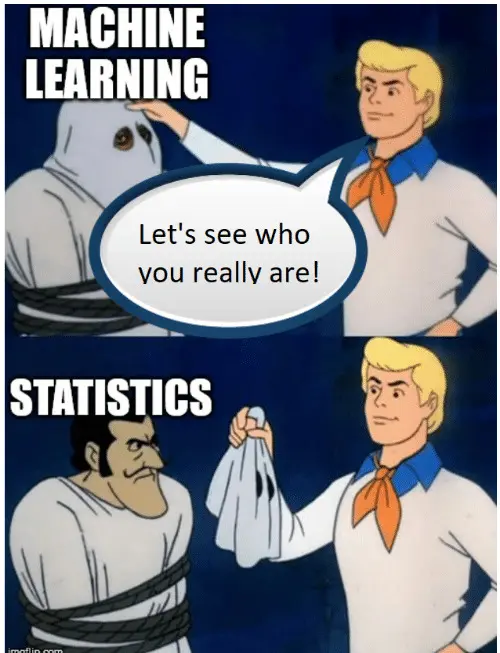


---

### 📝 Summary

- Linear regression and mixed effects models (like linear regression with fixed and random effects) finds **relationships** and focuses on inference.
- Supervised ML uses those relationships to **make predictions** (the focus is on maximising model performance on **unseen** data).



# What is machine learning?

It was as “the field of study that gives computers the ability to learn without explicitly being programmed" by Arthur Samuel.

---
*In the examples above we introduced only one field of ML, which is called **supervised machine learning***.


## What is *Supervised Machine Learning*?

---

**Supervised Machine Learning (ML)** is a type of ML that focuses on building models that **learn patterns from labeled data** to make **predictions or decisions** about new, unseen examples.

---

### 🎯 Key Idea

Each training example has:
- **Input features** → variables we can measure (e.g. age, protein levels, UPDRS score)
- **Output label** → the known outcome (e.g. Parkinson’s diagnosis, LEDD value)

The model learns a **mapping function**:  
$$
f(\text{features}) \rightarrow \text{label}
$$

💡 Instead of writing explicit *“if–then”* rules, the model **learns** relationships between inputs and outputs directly from the data — by optimizing internal **parameters** (like coefficients or decision thresholds).

---

### Examples of Supervised Learning Tasks

| Goal | Type | Example |
|------|------|----------|
| Disease Diagnosis | **Classification** | Predict whether a patient has Parkinson’s (0 = No, 1 = Yes) |
| Drug Dosage Prediction | **Regression** | Estimate LEDD value from clinical features |

---

### Example in Context

Instead of writing hard-coded rules like:
> *“If UPDRS > φ, then LEDD increases by ψ”*  
> *“If protein SNCA > ζ, then PD risk increases by ω”*  

we allow the **model** to learn these relationships from data.  

For instance:
- **Predicting LEDD:** uses `UPDRS score`, `age`, `sex`, `years since diagnosis`
- **Predicting PD diagnosis:** uses `protein A`, `protein B`, `protein N`, etc.

---

### Training vs. Testing

Supervised ML involves **two main phases**:

| Phase | Purpose | Data Used |
|-------|----------|-----------|
| **Training** | Learn the patterns and relationships | Data with known labels |
| **Testing** | Evaluate performance on new, unseen data | Held-out data (not used in training) |

This split allows us to estimate how well the model **generalises** — i.e., performs on real-world, unseen patients rather than just memorising the training data.

---

### 📝 Summary

In supervised ML we train a model from examples,  **build a predictive model**, and then **test its understanding** on unseen cases,  much like how humans learn from experience before applying knowledge to new situations.


Therefore, to evaluate whether a supervised ML model performs well, we split our labeled data into two sets: a training set and a test set. The training set allows the model to learn patterns and relationships between features and labels. The test set, which the model has never seen during training, is used to assess how well the model generalizes to new, unseen data.
This **train-test split** is the **first key step** we will focus on in our task.

Let's see how we can do this in the example below where we are asked to predict a patient’s **tremor level** using their **proteomics data**?

---

## Task 1: Predicting tremor severity using proteomics and demographic variables.

### Synthetic Parkinson’s Disease Dataset Overview

This synthetic dataset contains selected plasma proteins from the **Olink Explore panel** for **500 individuals**, generated to model **PD** and related covariates.

- **Cohort Composition**
  - Includes both **PD cases** and **controls**
  - Roughly **30% of individuals diagnosed with PD**
  - Demographic variables:
    - **Age**
    - **Sex**
  - Groups are **age- and sex-matched** to reduce confounding


- **Protein Measurements**
  - Measured using the **Olink NPX platform**
  - Covers **40 selected proteins**, including key neurodegenerative and inflammatory markers.

- **Tremor Severity Score**
  - Measured using **wearable sensors or accelerometers**
  - Captures **hand and arm movement patterns**
    - Quantifies:
    - **Amplitude**
    - **Frequency**
  - Simulated and scaled from **0 to 10**
  - Higher values indicate **more severe tremor**

---

### Here we will use **proteomics and demographic variables** as features to predict tremor severity.


In [2]:
#Let's import our packages. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk #We are importing the library sklearn (scikit-learn). This is the library we will be using for the simple ML models and the essential preprocessing tasks in this workshop.


In [3]:
#In this cell, we are loading our dataset. 

df = pd.read_csv("Proteomics_tremor_PD.csv", index_col="patient_id")

### Data Preparation Before Modelling

Before fitting any model, we must ensure that:

- **Numerical features** are stored as numeric types (`int`, `float`).
- **Categorical features** are properly encoded into a numerical format suitable for machine learning algorithms.

For this, we will use the built-in Pandas function **`pd.get_dummies`**, which creates one-hot encoded (0/1) columns for categorical variables. This approach is simple and fast. 


Another way to do this is **one-hot encoding** for categorical variables https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html .  
This approach creates binary (0/1) indicator columns for each category and is ideal for ML modelling because it:

- Converts categorical data into a machine-readable format.  
- **Handles unknown categories** gracefully in unseen (test) data when configured properly.  
- Keeps preprocessing consistent across training and testing phases.

---


In [4]:
#Here I am defining the protein columns which comprise part of our features

protein_cols = df.columns[4:].tolist()

In [5]:
df

parkinson_diagnosis        age     sex  tremor_score     ITGAV  \
patient_id                                                                    
Patient_001                    0  57.493855  Female      5.064684  0.161197   
Patient_002                    0  54.896299  Female      0.803153  0.962733   
Patient_003                    1  63.864061    Male      8.216346 -3.847049   
Patient_004                    1  52.403493  Female      8.930688 -3.481894   
Patient_005                    0  54.324403  Female      5.415677 -1.627285   
...                          ...        ...     ...           ...       ...   
Patient_496                    0  67.886636  Female      5.233593  0.065599   
Patient_497                    1  65.996314    Male      6.799997 -2.830916   
Patient_498                    0  57.472752  Female      4.537877 -0.763326   
Patient_499                    0  54.550985    Male      3.603921 -0.857539   
Patient_500                    0  63.259667  Female      2.461515 -0.789055   

                  IL8       TNF       CRP     VEGFA       EGF  ...       APP  \
patient_id                                                     ...             
Patient_001  1.686528  1.044975  4.404670 -0.436943  0.074188  ...  5.080607   
Patient_002  0.063521  0.067884 -0.566883 -0.661328  1.460958  ... -2.170150   
Patient_003  1.478183  1.288762  0.761512  0.749485 -3.045364  ...  4.250941   
Patient_004  5.032211 -2.580469 -1.908804 -1.278471 -0.488784  ...  0.311995   
Patient_005  2.635275  1.691762 -6.635746 -0.388916 -2.839664  ...  1.652381   
...               ...       ...       ...       ...       ...  ...       ...   
Patient_496  1.420262 -0.419763 -0.658778  0.234852 -2.510273  ... -0.521515   
Patient_497 -0.193873  0.221932 -3.624020 -1.761219  3.345794  ...  2.553949   
Patient_498 -0.435340  0.856620 -2.111877 -0.025036 -2.680044  ... -2.480392   
Patient_499  0.850567  1.440406 -0.761626 -4.970932 -1.979682  ...  2.038039   
Patient_500  3.235574 -0.394431  2.661906 -0.564537 -0.212797  ...  3.155839   

                BACE1      SNCA      MAPT      GFAP     UCHL1       VGF  \
patient_id                                                                
Patient_001 -5.281515 -1.074320  3.159562  0.769264  1.893577  2.677999   
Patient_002 -0.870471 -1.817304 -1.987365 -1.078412 -2.234552 -0.045389   
Patient_003 -4.677648  1.327817  3.149145  5.059428  4.688059 -0.036466   
Patient_004 -0.824140  3.060569 -0.351803  4.298080  5.348093 -2.001040   
Patient_005 -0.668973  0.833778 -1.243726 -0.310413  0.732579 -1.959152   
...               ...       ...       ...       ...       ...       ...   
Patient_496 -1.330306 -0.735260 -0.490756  4.995892  1.660341  1.455436   
Patient_497 -0.129152  1.968931  2.537934  0.188473  1.741758  4.418329   
Patient_498 -1.403365 -0.501268  6.000350  2.348217  3.480768  0.373482   
Patient_499 -0.630962  0.624613  2.975957  1.879630 -0.338804 -1.702876   
Patient_500  0.375257 -2.622812  0.107329  0.872921 -2.484918 -0.873224   

                 NME3    BPIFB1     DCTN6  
patient_id                                 
Patient_001  2.088194  4.411344 -3.187070  
Patient_002 -0.649770 -0.636294 -0.940624  
Patient_003 -1.487096  0.617676 -1.062779  
Patient_004 -2.119296 -1.253829 -0.467242  
Patient_005 -2.900953  0.509404 -2.406333  
...               ...       ...       ...  
Patient_496 -0.213803 -0.683769 -1.856051  
Patient_497 -0.359004 -1.996823  0.586625  
Patient_498  1.549383 -2.293425  0.959275  
Patient_499 -1.334514 -2.270574  0.851979  
Patient_500 -0.362928  1.517170  1.246027  

[500 rows x 44 columns]

### <span style="color:blue">Exercise:</span> Define the numerical and categorical features. Features are only the columns that will be used to predict the outcome.

In [6]:
numerical_features = protein_cols + 
categorical_features = 

SyntaxError: invalid syntax (107745441.py, line 1)

In [7]:
#Answer

numerical_features = protein_cols + ["age"]
categorical_features = "sex"

In [8]:
df[numerical_features] = df[numerical_features].astype(float)

In [9]:
df = pd.get_dummies(df, columns=["sex"], drop_first=True)

### <span style="color:blue">Exercise:</span> using the methods you have learnt in the previous workshops merge the age, sex, protein columns together to create a new list named features. Check after pd.get_dummies how the "sex" column was renamed.


In [10]:
features = protein_cols + 

SyntaxError: invalid syntax (2933864382.py, line 1)

In [11]:
#Answer

features = protein_cols + ['age'] + ['sex_Male']

We first define which columns are our features (which consist the X) and which column is our target variable (the dependent one) which is the y.


In [12]:
X = df[features]
y = df["tremor_score"]



### 1. **Split**: Splitting the data into training set and test set.

In [13]:
#You need to specify the test size. Usually in a simple train/test split we split the dataset into 70 % training set and 30% (70-30) test set or 80% training set and 20% (80-20) test set. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, #we need to split both the X (features) and the y (target)
    test_size=0.2, #0.2 corresponds to 20% of the data will belong to the test set. 
    random_state=42  #You need to set a random_state as a specific number for reproducibility purposes. If you change the number the splitting will be done differently.
)

### <span style="color:blue">Exercise:</span> Fix the code below to split the dataset using the 70-30 ratio:  

In [14]:
X_train, X_test, y_train, y_test = train_test_split(y,X, train_size=0.3, random_state=0)

In [15]:
#Answer
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=0)

### 2. **Missing values**: The next important step in preparing data for machine learning is handling missing values, as most standard ML models (such as those from scikit-learn) cannot process missing data directly.

In [16]:
X_train.isna().sum().sum()

np.int64(0)

Here we do not have missing values.

However, if missing values are present, columns (features) and rows (samples) with a high proportion of missing data — above a defined threshold — should be removed.
The remaining missing values should be imputed using appropriate techniques, such as those covered in previous workshops (e.g., mean, median, mode, or more advanced imputation methods).

 ###  3. **Scaling**: The next important step is to scale or normalize the features (per column) before fitting the model. This is important because, without scaling, features with larger numerical values can disproportionately influence the model, potentially leading to biased or suboptimal results.

Here we will use **StandardScaler**, which is one of the most commonly used feature scaling methods in machine learning. It standardizes features by removing the mean and scaling to unit variance, which helps many ML algorithms perform better.

📖 **Read more about `StandardScaler`**:  
[https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

There are also other scaling and normalization methods available, depending on your data and the model you're using.

📚 **Explore other preprocessing methods in scikit-learn**:  
[https://scikit-learn.org/stable/api/sklearn.preprocessing.html](https://scikit-learn.org/stable/api/sklearn.preprocessing.html)


In [17]:
from sklearn.preprocessing import StandardScaler 

In [18]:
scaler = StandardScaler() # First you need to define the scaler instance

X_train_scaled = scaler.fit_transform(X_train)  # It is important to fit and transform the scaler on the training data 

X_test_scaled = scaler.transform(X_test) # It is important to  only transform the test data using the scaler



### **How we apply scaling matters**

### Fit and Transform on Training Data
- **Fitting** a scaler computes statistics like mean and standard deviation from the **training data only**.
- **Transforming** the training data applies these statistics to scale the features.
  
This ensures that the model learns patterns based only on the training data and avoids **data leakage** from the test set.

### Transform on Test Data
- Once the scaler is fitted on training data, we **only transform the test data** using the same scaler.
- This scales the test features consistently with the training set without giving the model any information from the test data.

### Why This Matters
- Prevents information from the test set from influencing the model (data leakage) and inflating its performance. 

---

### 4. **Training** 

In [19]:
from sklearn.linear_model import LinearRegression #The sklearn library has ready to import and use ML models. Today we will use linear regression.

model = LinearRegression() # we create the instance of our model

model.fit(X_train_scaled, y_train) # we are "fitting it" on our dataset. This represents the training phase.

LinearRegression()

When you click on the arrow (▸) next to a model in a notebook or output cell, you can view the different **hyperparameters** used by the model.

- `fit_intercept=True` means that the model will learn an intercept term (bias) in addition to the coefficients. This is useful when the data is not centered around zero.
- `tol=1e-06` stands for the **tolerance** for stopping criteria. It determines how small the improvement in the optimization process must be before the algorithm decides to stop.

These values are the **default settings** provided by `scikit-learn`, but they can (and often should) be modified to better fit your specific dataset.

There are also ways to **automatically search for the best hyperparameters**, including:
- **Grid Search**
- **Random Search**
- **Bayesian Optimization**
- **Genetic Algorithms** (less common but used in some advanced settings)

🔗 **You can read more about hyperparameter tuning here:**  
- [scikit-learn Grid Search documentation](https://scikit-learn.org/stable/modules/grid_search.html)  
- [Hyperparameter tuning overview](https://scikit-learn.org/stable/modules/model_selection.html#tuning-hyperparameters)



### 5. **Interpreting** our model

So our model now has learnt the parameters of the training data. Our model is a linear regression model which can be described by this equation, as said before: 

$$
y = \gamma + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3
$$

So let's see what **coefficients** it learnt!

In [20]:
# Extract coefficients and intercept
coefs = model.coef_
intercept = model.intercept_

# Create the regression equation dynamically
equation = f"Learnt equation: tremor = {intercept:.2f}"
for feature, coef in zip(features, coefs):
    equation += f" + ({coef:.2f})*{feature}"

print(equation)


Learnt equation: tremor = 4.74 + (-0.78)*ITGAV + (0.02)*IL8 + (0.07)*TNF + (-0.04)*CRP + (0.00)*VEGFA + (-0.01)*EGF + (0.03)*MMP9 + (0.03)*REN + (-0.04)*NTRK3 + (0.07)*CXCL10 + (0.02)*CCL2 + (-0.03)*CCL3 + (-0.05)*CCL4 + (0.05)*CXCL9 + (-0.00)*CXCL11 + (0.03)*PDGFB + (-0.02)*KITLG + (0.04)*FGF21 + (-0.03)*INSR + (0.02)*LEP + (0.00)*IGF1 + (0.02)*IGFBP3 + (-0.00)*NTRK2 + (-0.04)*NCAM1 + (0.03)*VCAM1 + (-0.06)*ICAM1 + (-0.03)*SELE + (-0.02)*PECAM1 + (0.09)*GDF15 + (0.01)*MMP2 + (-0.01)*APP + (-0.02)*BACE1 + (0.79)*SNCA + (0.02)*MAPT + (0.71)*GFAP + (0.45)*UCHL1 + (-0.01)*VGF + (0.01)*NME3 + (0.04)*BPIFB1 + (-0.04)*DCTN6 + (-0.00)*age + (0.07)*sex_Male


#### <span style="color:blue">Question (?) :</span> What does this mean? What relationship do the proteins ITGAVE, TNF, SNCA have with the tremor scores? What relationship do age and sex have with tremor scores? 


(Answer)

### 6. **Evaluating** our model 

The point of ML is not only to infer relationships as this would be enough to do with statistics. Can we actually predict tremor scores based on the training our model did? How do we evaluate our model on the test data. 

In [21]:
y_pred = model.predict(X_test_scaled) 

#Here we are testing our model by making it predict the y (tremor scores) based on the X (features' values) from the training data. It basically uses the equation learnt above.
# If this equation generalises across all samples then our predictions will be correct


Lets compare now our predicted tremor values (y_pred) with the real tremor values (y_test).

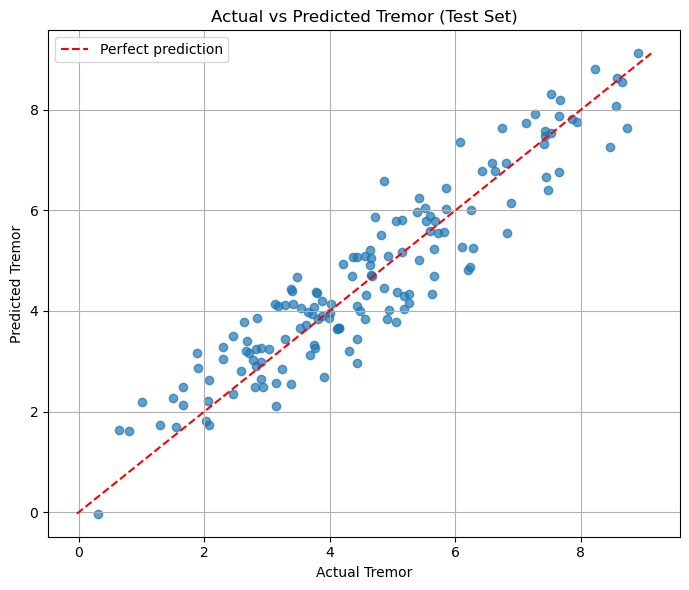

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, "r--", label="Perfect prediction")
plt.xlabel("Actual Tremor")
plt.ylabel("Predicted Tremor")
plt.title("Actual vs Predicted Tremor (Test Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Okay but, we need to be able to describe our model with numbers. how can we compare between models or hyperparameters to make the difference between the predicted and the real data minimal?
How can we visualise the difference in one single number?

For this reason, we need metrics. 


### Regression Evaluation Metrics

When we build a regression model, we want to measure **how well the predicted values ($\hat{y}$) match the true values ($y$)**. There are several standard metrics to do this:

---

#### 1. Mean Absolute Error (MAE)

**Definition:**  
The MAE measures the **average magnitude of errors** in a set of predictions, without considering their direction.

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

**Where:**  
- $y_i$ = true value  
- $\hat{y}_i$ = predicted value  
- $n$ = number of samples  

**Interpretation:**  
- MAE gives an intuitive measure of the average error.  
- Smaller values indicate **better predictive accuracy**.  
- MAE is in the **same units as the target variable**.

---

#### 2. Mean Squared Error (MSE)

**Definition:**  
The MSE measures the **average squared difference** between predicted and actual values.

$$\
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
$$

**Interpretation:**  
- MSE penalizes **larger errors more heavily** due to squaring.  
- Smaller MSE indicates **better predictive accuracy**.  
- The units are **squared**, so sometimes the square root (RMSE) is used for interpretability.

---

#### 3. Coefficient of Determination ($R^2$)

**Definition:**  
$R^2$ measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}{\sum_{i=1}^{n} \left( y_i - \bar{y} \right)^2}
$$

**Where:**  
- $\bar{y}$ = mean of the true values  

**Interpretation:**  
- $R^2 = 1$ → perfect prediction  
- $R^2 = 0$ → model predicts no better than the mean  
- $R^2 < 0$ → model performs worse than predicting the mean

**Basically, R² answers the question:**  
*"How much of the outcome's variation does my model explain?"*


**Biological systems are inherently noisy and complex.** Here's what to expect:

| R² Range | Interpretation | Context |
|----------|----------------|---------|
| **R² > 0.7** | Excellent | Rare in biology, indicates very strong predictive features |
| **R² = 0.5–0.7** | Good | Typical for complex traits (example, disease progression) |
| **R² = 0.3–0.5** | Modest | Common in neuroscience, still clinically valuable |
| **R² < 0.3** | Weak | May still be scientifically interesting |


In [23]:
#Let's import our metrics from scikit learn

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean absolut error:", mae)
print("Mean squared error:", mse)
print("R²:", r2) 

Mean absolut error: 0.5766700379128749
Mean squared error: 0.48656031275235456
R²: 0.8675092854550686



So far, we have focused on predicting **continuous outcomes** like tremor scores using regression.

But sometimes, we are interested in **categorical outcomes** - a simple **yes or no** decision.



Given a patient’s proteomic profile, **can we predict whether they will develop Parkinson's disease or not?**

This is a different problem called **classification**, where the goal is to assign each individual to a class (e.g., *disease* vs *no disease*).

---




### Regression vs Classification




Supervised ML is divided into regression, when the outcome is quantitative (e.g. LEDD) or classification , when the outcome is qualitative (presence or absence of a disease)


---

### Key differences from regression:

| Regression                 | Classification              |
|----------------------------|----------------------------|
| Predicts continuous values | Predicts discrete categories (classes) |
| Example: tremor severity   | Example: disease status (yes/no) |

---
---

In the next section, we will explore the classification algorithm called Logistic Regression and we will learn how it works and how to evaluate it.


## Task 2: Predicting disease status using proteomics

The same dataset from the previous task is used here.

 Here we will use proteomics only, to predict Parkinson's Disease. 

Let's first start by inspecting our label.

In [24]:
df["parkinson_diagnosis"]

patient_id
Patient_001    0
Patient_002    0
Patient_003    1
Patient_004    1
Patient_005    0
              ..
Patient_496    0
Patient_497    1
Patient_498    0
Patient_499    0
Patient_500    0
Name: parkinson_diagnosis, Length: 500, dtype: int64

## Label Datatype for Classification

In classification tasks, the datatype of the label is important because it determines how the model interprets the target.

### Numeric Labels
- Labels stored as numbers (`int`, `float`) may be interpreted as **continuous values**, which is suitable for regression, **not classification**.
- Example: `0, 1, 2` could be wrongly treated as numeric quantities rather than discrete classes.

### Categorical / Object Labels
- Labels should be **categorical** (`object` or `category` in pandas) for classification.
- This tells the model that the target represents **discrete classes**.


In [25]:
df["parkinson_diagnosis"] = df["parkinson_diagnosis"].astype("object")

###  Let's explore the data before splitting. 

### You always have to ask the questions below before splitting your data as it will influence your splitting strategy (how you are going to split the data between the train and test set).


### How many participants do we have? 

In [26]:
df.reset_index(inplace=True)

In [27]:
df["patient_id"].nunique() 

500

### How many samples per participant do we have? 

In [28]:
df["patient_id"].value_counts() 

patient_id
Patient_001    1
Patient_330    1
Patient_343    1
Patient_342    1
Patient_341    1
              ..
Patient_162    1
Patient_161    1
Patient_160    1
Patient_159    1
Patient_500    1
Name: count, Length: 500, dtype: int64

In [29]:
df["patient_id"].value_counts().unique()

array([1])

## Repeated measures in ML
Here we have only one sample per patient. 

However, in many biomedical datasets, we have **multiple samples per patient** (sometimes called *repeated measurements* or *longitudinal samples*).  

⚠️ These samples are **not independent**. Treating them as independent in statistical tests or ML models can lead to biased results.

## Why It Matters

- If you randomly split your data into training and test sets **at the sample level**, the model might see samples from the same patient in both sets.  
- This introduces **data leakage**, giving the model an unfair advantage and overestimating performance.

## How to Handle It in ML

1. **Select one sample per patient**  
   - Simplest approach: only keep a single sample per patient for training and testing.  

2. **Group-aware splitting**  
   - If you want to keep all samples, make sure **all samples from the same patient stay together** in either the training or test set.  
   - Scikit-learn provides tools for this: We will not deal with this here but you can read more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html


### How many cases of positive and negative diagnoses do we have? 

In [30]:
df["parkinson_diagnosis"].value_counts()

parkinson_diagnosis
0    350
1    150
Name: count, dtype: int64

### <span style="color:blue">Exercise:</span>  Define the features and target variables below. Remember we are only using the proteomics columns to predict Parkinson's here.

In [31]:
#Define the features and target variables below: 

X = df
y= df 

In [32]:
#Answer
X= df.set_index(["patient_id"])[protein_cols]
y= df["parkinson_diagnosis"].astype(str)

## Class imbalance 
We’re dealing with a **class imbalance** problem. Our positive class (Parkinson’s Disease) has only 150 samples, while the negative class has 350 samples. There are many ways to deal with class imbalance such as weighting your model to focus more on the minority class (in our case the Parkinson's class.), or using specific models that account for class imbalance , or downsampling or upsampling. However, we wont focus on those today. You can read more about this here: https://medium.com/data-science/class-imbalance-strategies-a-visual-guide-with-code-8bc8fae71e1a 


### Ensuring Fair Class Representation

When dealing with two classes (e.g., Parkinson’s Disease vs. controls), it is important to ensure that the **model sees both classes in the training data** and is **evaluated fairly on both**.  

To achieve this, we need to maintain **similar class ratios in both the training and test sets**. In scikit-learn, this is done using the `stratify` argument in `train_test_split`, which ensures the **proportion of PD and control samples remains consistent** across both sets.



### 1. **Split**: 


### <span style="color:blue">Exercise:</span> Can you try to ensure fair class representation using "stratify" in the train test split? 

💡 Tip:
If you're unsure how to implement a particular step in code, you can check the [Scikit-learn train-test split documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and related discussions on [Stack Overflow](https://stackoverflow.com/questions/29438265/stratified-train-test-split-in-scikit-learn). These resources often provide practical examples. 

In [33]:
X_train, X_test, y_train, y_test = train_test_split()

ValueError: At least one array required as input

In [34]:
# Answer
X_train, X_test, y_train, y_test = train_test_split(X[protein_cols],y, stratify=y.values, train_size=0.8, random_state=24)

### 2. **Missing values** Do we have missing values?


In [35]:
X_train.isna().sum() 

ITGAV     0
IL8       0
TNF       0
CRP       0
VEGFA     0
EGF       0
MMP9      0
REN       0
NTRK3     0
CXCL10    0
CCL2      0
CCL3      0
CCL4      0
CXCL9     0
CXCL11    0
PDGFB     0
KITLG     0
FGF21     0
INSR      0
LEP       0
IGF1      0
IGFBP3    0
NTRK2     0
NCAM1     0
VCAM1     0
ICAM1     0
SELE      0
PECAM1    0
GDF15     0
MMP2      0
APP       0
BACE1     0
SNCA      0
MAPT      0
GFAP      0
UCHL1     0
VGF       0
NME3      0
BPIFB1    0
DCTN6     0
dtype: int64

In [36]:
X_train.isna().sum().sum() # This command will give you the missing values in the entire dataset

np.int64(0)

### **3. Selecting features**

In our previous regression example, we used all available features. However, not all of them may be informative for *tremor severity* or *Parkinson’s Disease* classification.  

Some features might:
- capture **noise** rather than signal,  
- be **irrelevant** to the biological process of interest, or  
- be **redundant**, contributing little new information. *(This is very common in biological data, where multiple proteins, genes, or transcripts can be highly correlated because they participate in the same pathways or are co-regulated, leading to overlapping biological signals.)*

Including these uninformative features can:
- increase computation time, and  
- even **harm performance** due to overfitting.


---

### What Feature Selection Does
**Feature selection** aims to identify and keep only those variables that are truly informative for the target variable (e.g., *tremor score* or *PD diagnosis*).

This helps the model:
- focus on biologically meaningful signals,  
- generalize better to new data, and  
- potentially improve predictive accuracy.

---

###  Filter Methods
The simplest feature selection methods are **filter methods**.  
They rely on **statistical tests** to assess the relationship between each feature and the target, *independently of the model*.

For example:
- For **continuous** outcomes → use correlation tests (e.g., Pearson, Spearman).  
- For **categorical** outcomes (like PD vs. Control) → use group comparison tests (e.g., t-test, Mann–Whitney U, ANOVA, Kruskal–Wallis).

In your proteomics case:
- You could compare NPX levels for each protein between PD and non-PD participants.  
- Proteins showing statistically significant differences are likely biologically and diagnostically relevant.  
- These selected proteins can then be used as features for your machine learning model.

---


###  Feature Selection on Training Set Only

It is important to perform feature selection **only on the training set**.  

In a real-world scenario, we would **not have prior knowledge** about which features are most informative for unseen data (the test set).  
If we were to use the test set to guide feature selection, we would be **leaking information** from the test set into the model. This can lead to:

- Over-optimistic performance estimates, and  
- Models that do not generalize well to new, unseen data.  

By restricting feature selection to the training set, we ensure that our evaluation on the test set remains **unbiased and realistic**.


In [37]:
# Before performing feature selection, we create a dataframe containing only the training samples, the features that we will use (protein columns) and the label (parkinson_diagnosis).
#  We do not have one that have both X and y together as we have splitted X and y separately. 

X_features = df.loc[df["patient_id"].isin(X_train.index), protein_cols + ["parkinson_diagnosis"]] 


In [38]:
#Let's check for normality using the shapiro test! 

from scipy.stats import shapiro

# Store results
normality_results = []

for protein in protein_cols:  
    # Shapiro-Wilk test for normality
    stat, p_value = shapiro(X_features[protein])
    normality_results.append({
        "Protein": protein,
        "Shapiro_p": p_value,
        "Normal": p_value > 0.05  # True if normally distributed
    })

normality_df = pd.DataFrame(normality_results)
normality_df.sort_values("Normal", ascending=False, inplace=True)

# Display summary
print(normality_df)



   Protein  Shapiro_p  Normal
20    IGF1   0.705960    True
29    MMP2   0.749805    True
22   NTRK2   0.267929    True
23   NCAM1   0.206035    True
24   VCAM1   0.889604    True
25   ICAM1   0.919935    True
26    SELE   0.333492    True
27  PECAM1   0.808088    True
28   GDF15   0.636722    True
30     APP   0.566268    True
1      IL8   0.302346    True
31   BACE1   0.068796    True
33    MAPT   0.419990    True
34    GFAP   0.750101    True
35   UCHL1   0.907098    True
36     VGF   0.805312    True
37    NME3   0.425528    True
38  BPIFB1   0.803044    True
21  IGFBP3   0.640254    True
39   DCTN6   0.094353    True
19     LEP   0.403408    True
18    INSR   0.233522    True
2      TNF   0.195954    True
3      CRP   0.552097    True
4    VEGFA   0.833851    True
5      EGF   0.432054    True
6     MMP9   0.315171    True
7      REN   0.492443    True
8    NTRK3   0.364447    True
9   CXCL10   0.164041    True
10    CCL2   0.076061    True
11    CCL3   0.829158    True
12    CCL4

### ⚖️ Choosing the Statistical Test for Feature Selection

After checking the distribution of each protein in the training set, we found that **not all proteins are normally distributed**.  





### <span style="color:blue">Exercise:</span> After checking whether the proteins are normally distributed, we need to check the variance to select the statistical test. Check the variance with the levene test which you were introduced to, in the previous workshop. Use the syntax used above to do the same. if you do not remember how to apply levene's refer to the previous workshop or to the documentation here :https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

In [39]:


from scipy.stats import levene

# Initialise an empty list
levene_results = [] # Don't change this line

for  
    # Get data for the two groups as levene expects the two different groups. 
    group1 = X_features[X_features['parkinson_diagnosis'] == 0][protein] # Don't change this line
    group2 = X_features[X_features['parkinson_diagnosis'] == 1][protein] # Don't change this line
    
    # Levene's test
     = levene(group1, group2)
    
    levene_results.append({
        "Protein": protein,
        "Levene_stat": , 
        "Levene_pvalue": ,
        "Equal_Var":  # Fix the condition as before
    })

# Convert to DataFrame
levene_df = pd.DataFrame(levene_results)

# Display results
print(levene_df)


SyntaxError: invalid syntax (2930818166.py, line 6)

In [42]:
#Answer
from scipy.stats import levene
# Initialise an empty list
levene_results = [] # Don't change this line

for protein in protein_cols:  
    # Get data for the two groups as levene expects the two different groups. 
    group1 = X_features[X_features['parkinson_diagnosis'] == 0][protein] # Don't change this line
    group2 = X_features[X_features['parkinson_diagnosis'] == 1][protein] # Don't change this line
    
    # Levene's test
    stat, pval= levene(group1, group2)
    
    levene_results.append({
        "Protein": protein,
        "Levene_stat": stat, 
        "Levene_pvalue": pval,
        "Equal_Var": pval > 0.05  # Fix the condition as before
    })

# Convert to DataFrame
levene_df = pd.DataFrame(levene_results)

# Display results
print(levene_df)


   Protein  Levene_stat  Levene_pvalue  Equal_Var
0    ITGAV     0.000188       0.989076       True
1      IL8     0.644564       0.422542       True
2      TNF     0.461255       0.497433       True
3      CRP     1.958940       0.162406       True
4    VEGFA     0.002120       0.963298       True
5      EGF     0.013799       0.906548       True
6     MMP9     0.236262       0.627186       True
7      REN     0.671440       0.413040       True
8    NTRK3     0.041973       0.837777       True
9   CXCL10     0.281357       0.596109       True
10    CCL2     0.000096       0.992205       True
11    CCL3     0.872117       0.350936       True
12    CCL4     0.006342       0.936568       True
13   CXCL9     3.291356       0.070398       True
14  CXCL11     0.007585       0.930640       True
15   PDGFB     0.066123       0.797201       True
16   KITLG     0.527266       0.468185       True
17   FGF21     1.321709       0.250976       True
18    INSR     0.529664       0.467176       True


### So which test should we use? 

### Statistical Test Selection

**Normality Check:**  
Two features only in the dataset violate the assumption of normality based on Shapiro–Wilk tests.

**Sample Size Consideration:**  
The dataset includes over 200 participants. According to the **Central Limit Theorem (CLT)**, the sampling distribution of the mean approaches normality for large sample sizes, making parametric tests robust even if individual features are not perfectly normal.

**Variance Check:**  
Variance appears to be different for some proteins (n=88) between the two groups (Control vs Parkinson’s), as assessed by the Levene's test.

**Test Choice:**  
Based on the above, we will use the **Welch's t-test** for comparing feature means between the two groups. We could perform Student's t-test for the variables that are normally distributed with equal variance, Welch's t-test for those that are normally distributed with unequal variance, and Mann-whitney for those that are not normally distributed but based on the CLT and in order to remain consistent in the analysis we will move forward with the Welch's t-test.



In [43]:
from scipy.stats import ttest_ind
import pandas as pd
from statsmodels.stats.multitest import multipletests

# Store results
welch_results = []

for protein in protein_cols:
    group0 = X_features.loc[X_features["parkinson_diagnosis"] == 0, protein]
    group1 = X_features.loc[X_features["parkinson_diagnosis"] == 1, protein]
    
    stat, p_value = ttest_ind(group0, group1, equal_var=False, nan_policy='omit')
    
    welch_results.append({
        "Protein": protein,
        "Welch_t": stat,
        "p_value": p_value
    })

welch_df = pd.DataFrame(welch_results)

# Apply FDR (Benjamini–Hochberg) correction
pvals = welch_df["p_value"]
rejected, pvals_corrected, _, _ = multipletests(pvals, alpha=0.05, method='fdr_bh')
welch_df["FDR_p"] = pvals_corrected
welch_df["Significant"] = rejected

# Sort by corrected p-value
welch_df.sort_values("FDR_p", inplace=True)

print(welch_df.head(10))


   Protein    Welch_t       p_value         FDR_p  Significant
32    SNCA -24.343562  1.167611e-68  4.670444e-67         True
0    ITGAV  24.610897  1.918156e-66  3.836312e-65         True
34    GFAP  -6.654981  2.112526e-10  2.816701e-09         True
8    NTRK3  -1.967378  5.045997e-02  5.045997e-01        False
37    NME3  -1.600669  1.108369e-01  7.275136e-01        False
3      CRP   1.425617  1.551814e-01  7.275136e-01        False
27  PECAM1  -1.660492  9.824028e-02  7.275136e-01        False
9   CXCL10  -1.397415  1.636906e-01  7.275136e-01        False
20    IGF1  -1.524264  1.288120e-01  7.275136e-01        False
28   GDF15  -0.944886  3.457534e-01  8.928595e-01        False


In [44]:
significant_proteins = welch_df[welch_df["Significant"] == True]["Protein"].unique().tolist()

### <span style="color:blue">Exercise:</span> Now filter our training and test set to only include the significant proteins! 

In [45]:
X_train_filtered = 

X_test_filtered = 

SyntaxError: invalid syntax (1136840090.py, line 1)

In [46]:
#Answer

X_train_filtered = X_train[significant_proteins]

X_test_filtered = X_test[significant_proteins]

### Visualizing Protein Differences with Significance Stars 
#### (This step is optional and intended to provide you with some tutorial thay you can go back to, to enhance your visualisations with python.)

We can create **boxplots with significance stars** in Python using the [`statannotations`](https://github.com/trevismd/statannotations) package.  

This package allows you to:
- Perform statistical tests (e.g., Mann–Whitney U, t-test)
- Automatically add significance annotations (stars or p-values) to your plots
- Integrate easily with **Seaborn** or **Matplotlib** plots

**Example workflow:**
1. Create a Seaborn boxplot of a protein by group (e.g., PD vs control).
2. Overlay individual data points with `stripplot`.
3. Use `Annotator` from `statannotations` to define group comparisons and the test.
4. Apply the annotations to show significance stars directly on the plot.

This approach makes your visualizations **publication-ready** and avoids manually calculating p-values for each protein.
##

/var/folders/q1/m73gh2d94c1cmb4047hn_0p40000gp/T/ipykernel_29855/3932874951.py:39: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


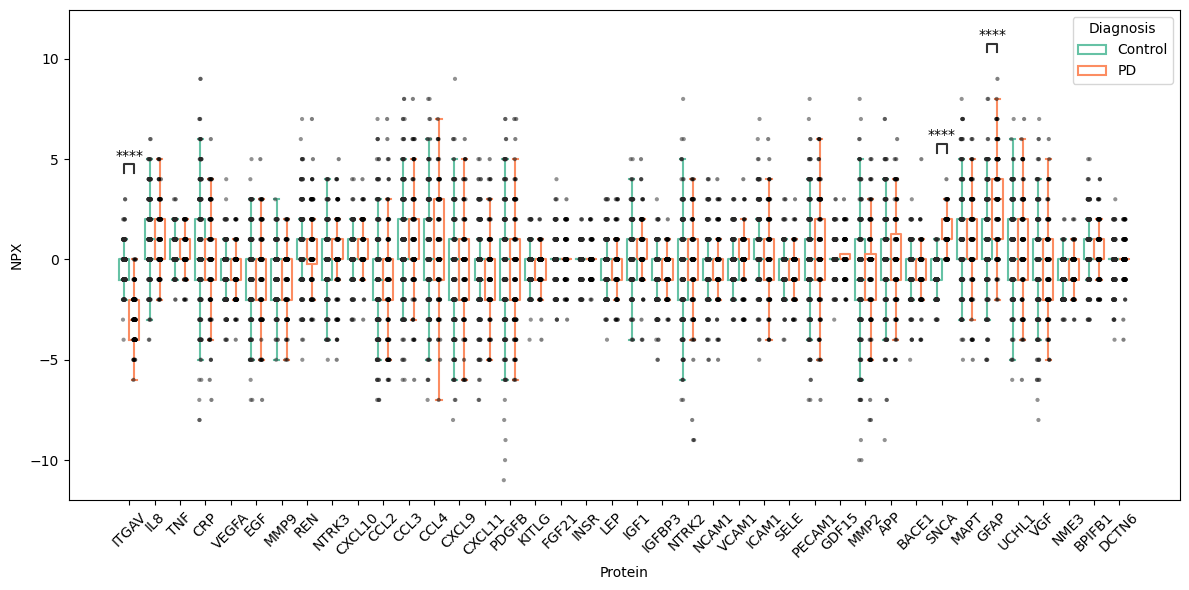

In [47]:

import matplotlib.pyplot as plt 
import seaborn as sns # we will use seaborn for the visualisation

from statannotations.Annotator import Annotator # For this test, we will use the statannotations, which will not only perform the statistical test but also add significance to the plots.

df_wide = X_features.dropna(subset=["parkinson_diagnosis"])

df_wide['parkinson_diagnosis'] = df_wide['parkinson_diagnosis'].astype('category')

# Melt wide dataframe to long dataframe
subset_df = df_wide.melt(
    id_vars=["parkinson_diagnosis"],  # keep diagnosis column
    var_name="Protein",
    value_name="NPX"
)
subset_df = subset_df[subset_df["Protein"].isin(features)]
subset_df["NPX"] = subset_df["NPX"].astype(int)
# Drop missing protein values
subset_df = subset_df.dropna(subset=["NPX"])

valid_proteins = subset_df.groupby("Protein")["parkinson_diagnosis"].nunique()
subset_features = valid_proteins[valid_proteins == 2].index # Only keep proteins that have values in both control and Parkinson's group
subset_df = subset_df[subset_df["Protein"].isin(subset_features)]



# --- 2. Create boxplot ---
plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=subset_df,
    x="Protein",
    y="NPX",
    hue="parkinson_diagnosis",
    palette="Set2",
    dodge=True,
    showfliers=False,
    fill=False
)
sns.stripplot(
    data=subset_df,
    x="Protein",
    y="NPX",
    hue="parkinson_diagnosis",
    dodge=True,
    color="black",
    size=3,
    alpha=0.5,
    ax=ax
)

# Remove duplicate legend from stripplot
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], ["Control", "PD"], title="Diagnosis")

# --- 3. Create pairs for statannotations ---
pd_labels = sorted(subset_df["parkinson_diagnosis"].unique())
pairs = [((protein, pd_labels[0]), (protein, pd_labels[1])) for protein in subset_features] # Here we need to specify the comparisons we want to make. Here we only want to compare each protein between PD and Control. 

# --- 4. Annotate statistics ---
annotator = Annotator(
    ax,
    pairs=pairs,
    data=subset_df,
    x="Protein",
    y="NPX",
    hue="parkinson_diagnosis"
)
annotator.configure(test="t-test_welch", comparisons_correction="BH", text_format="star", loc="inside", verbose=0,hide_non_significant=True) #Here we specify the test we want to perform (Mann whitney with BH correction). We also select the text_format of the way we want our p-values to appear and where we want them to be. Here I selected stars instead os text and I selected them to appear inside the borders of the boxplot 
annotator.apply_and_annotate()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **4. Scaling:** 
### <span style="color:blue">Exercise:</span>  Perform the scaling for the training and test set.


In [48]:
scaler = StandardScaler()
#
X_train_scaled = X_train_filtered

X_val_scaled = X_test_filtered

In [49]:
#Answer

X_train_scaled = scaler.fit_transform(X_train_filtered)

X_test_scaled = scaler.transform(X_test_filtered)

### **5. Training:** 

In [50]:
from sklearn.linear_model import LogisticRegression #The sklearn library has ready to import and use ML models. Today we will use linear regression.

model = LogisticRegression() # we create the instance of our Logistic Regression model

model.fit(X_train_scaled, y_train) # we are "fitting it" on our dataset. This represents the training phase.


LogisticRegression()

### LogisticRegression Parameters Explained
When you click on the arrow (▸) next to the model in the output cell, you can view the different **hyperparameters** used by the model.

These are the main parameters for `sklearn.linear_model.LogisticRegression and the default set by sklearn. As in the case of linear regression, you can set the models to different choices depending on your goal and the input data. However, we will not focus on this here.

You can read more about all parameters and options in the official scikit-learn documentation: [LogisticRegression — scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  


### **6. Evaluating**

In [51]:
y_pred = model.predict(X_test_scaled) 

#Here we are testing our model by making it predict the y (parkinsons diagnosis based on the X (features' values) from the training data. 


### Confusion Matrix

A **confusion matrix** is a useful tool for evaluating the performance of a classification model. It shows the counts of correct and incorrect predictions broken down by each class, allowing us to see not only the overall accuracy but also the types of errors the model makes.

For a binary classification problem like predicting Parkinson’s Disease (PD) versus control, the confusion matrix has four components:

1. **True Positives (TP):** PD cases correctly predicted as PD  
2. **True Negatives (TN):** Control cases correctly predicted as control  
3. **False Positives (FP):** Control cases incorrectly predicted as PD  
4. **False Negatives (FN):** PD cases incorrectly predicted as control  


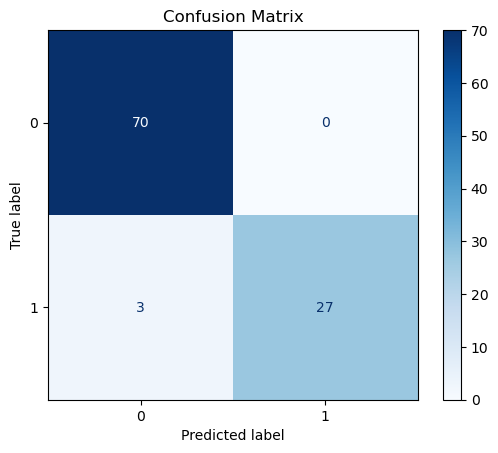

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


### <span style="color:blue">Exercise / Questions:</span> 

1. Identify the number of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) from the displayed confusion matrix.

2. Which type of error (FP or FN) would be more critical in a medical diagnosis context? Why?



### Answer : Interpreting the confusion matrix 
 The confusion matrix can be represented as:

|                  | Predicted Control | Predicted PD |
|------------------|-----------------|-------------|
| **Actual Control** | True Negative (TN) = 70 | False Positive (FP) = 0 |
| **Actual PD**      | False Negative (FN) = 3 | True Positive (TP) = 27 |

**Explanation:**
- **True Positive (TP):** PD cases correctly predicted as PD 
- **True Negative (TN):** Control cases correctly predicted as Control 
- **False Positive (FP):** Control cases incorrectly predicted as PD 
- **False Negative (FN):** PD cases incorrectly predicted as Control  


### **Summary evaluation metrics** 
### When comparing models, it is often easier to use **summary metrics** instead of looking at the full confusion matrix for each model. These metrics give a single number that quantifies performance, making comparisons straightforward. Commonly used metrics include:

From the confusion matrix, we can calculate important performance metrics:

- **Accuracy:** Proportion of total correct predictions  

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **Sensitivity / Recall:** Ability of the model to correctly identify PD cases  

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- **Specificity:** Ability of the model to correctly identify control cases  

$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

- **Precision:** Proportion of predicted PD cases that are actually PD  

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

By examining the confusion matrix and these metrics, we gain a clear understanding of how well the model distinguishes between PD and control, and where it tends to make mistakes. This is particularly important in medical applications, where **False Negatives (FN)** and **False Positives (FP)** have very different consequences.


###  <span style="color:blue">Exercise:</span>  Calculate the metrics of the model above using python as a calculator!

In [53]:
sensitivity = 

specificity = 

precision = 

accuracy = 

SyntaxError: invalid syntax (1215202667.py, line 1)

### Scikit learn and imblearn have built-in functions to calculate the metrics above.

###  <span style="color:blue">Exercise:</span>  Calculate the metrics that are missing below

In [ ]:

# Calculate the ones that are missing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.metrics import specificity_score #Specificity score is imported from the imbalanced-learn (imblearn) library 
accuracy = accuracy_score(y_test, y_pred)
recall = 
precision = 
specificity = specificity_score(y_test, y_pred) #Specificity score is imported from the imbalanced-learn library

SyntaxError: invalid syntax (2459940012.py, line 6)

In [54]:
#Answer

y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
specificity = recall_score(y_test, y_pred, pos_label=0)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Specificity:", specificity)




Accuracy: 0.97
Recall: 0.9
Precision: 1.0
Specificity: 1.0


### **6. Understanding the model:** 

### Accessing Logistic Regression Coefficients

In our binary classification problem, `model.coef_` contains the coefficients for the **positive class**.  

In [55]:
coefs = model.coef_[0]  # Access the coefficients for the positive class

### <span style="color:blue">Exercise:</span>  Match Proteins to Coefficients

Use a **for loop** to find which protein corresponds to which coefficient from a logistic regression model.

**Instructions:**
1. Loop over the indices of `significant_proteins`.
2. Access each protein name and its corresponding coefficient from `coefs` using the index.
3. Print the protein and its coefficient.


In [56]:
### Answer: 

for i in range(len(significant_proteins)):
    # Access protein name
    feature = significant_proteins[i]
    
    # Access corresponding coefficient
    coef = coefs[i]
    
    # Print result
    print(feature, coef)

SNCA 2.8530321650770554
ITGAV -2.5458751257223273
GFAP 0.8922638607884923


## Introduction to Dimensionality Reduction
 
In our last example, you were introduced to the concept of **feature selection** before applying machine learning models.  
In this section, you will learn more on **dimensionality reduction**, a broader concept that encompasses feature selection.  
Dimensionality reduction techniques help simplify datasets by reducing the number of input variables while preserving as **much relevant information** as possible.


We will learn how to clean data, extract meaningful features, and use dimensionality reduction to better understand and visualize our proteomics data.

## Dimensionality Reduction

### What is Dimensionality Reduction?
Dimensionality reduction is the process of **reducing the dimensions, meaning the number of features (variables) in a dataset** while keeping as much important information as possible.

High-dimensional datasets (like gene expression or proteomics data with hundreds or thousands of proteins) can be:  
- Sparse
- Computationally intensive and complex.
- Prone to overfitting in machine learning models  


This problem is called the **curse of dimensionality**. 





**Dimensionality reduction** simplifies the data, making it **easier to visualize, interpret, and model**, while retaining the underlying patterns.


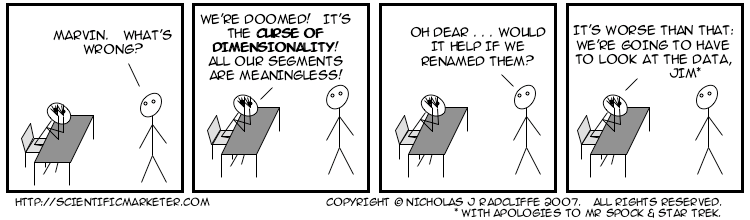


---

### Two Main Types

#### 1. Feature Selection (we did this in the previous section)
- Pick a subset of the original features that are most informative.  
- Example: selecting only the proteins that are significantly different between Parkinson’s Disease and healthy controls. 

---
  We have many protein features, and each one contributes some information to our model.  
  Dropping features may simplify the data but risks **losing important biological signals**.  

  Instead of discarding information, we can **encode all features into a lower-dimensional, meaningful representation**.  
  This process is known as **dimensionality reduction** - it compresses the data while preserving as much of its structure and variance as possible.  

---

#### 2. Feature Extraction
- Transform the original features into a smaller number of **new features** that capture most of the variation of the original ones.

- Example techniques:  
  - **PCA (Principal Component Analysis)**: Finds a low dimensional space by performing a linear projection and maximizing variance in the adta.  In this way we reduce the dimensionality (number of features) while maintaining as much variance and therefore information as possible. Read more here : https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d/

  - **UMAP  Uniform Manifold Approximation and Projection** : It is a non-linear method that constructs a high-dimensional graph representation of the data and then optimises the low dimensional graph.  It is good for scalability in large datasets with non-linear relationships and when scalability and speed is important. It is a stochastic method which means that the representation is drawn from a probability distribution, making it inherently non-reproducible. 

  -  **t-SNE (T-distributed Stochastic Neighbor Embedding)** : It is a stochastic method. It is iterative. It works repeatedly by moving datapoints closer or further away from each other depending on how similar they are. The new representation is non-linear which is important for getting insights from data that are non-linearly separable. It is mainly used for visualisation. t-SNE is much slower than the other two methods. 

      Read more on UMAP and t-SNE here :https://pair-code.github.io/understanding-umap/ 


  ### Why Use Feature Extraction?
  - Reduces noise in the data  
  - Makes models faster and simpler  
  - Helps visualize complex high-dimensional data  
  - Can improve generalization of machine learning models





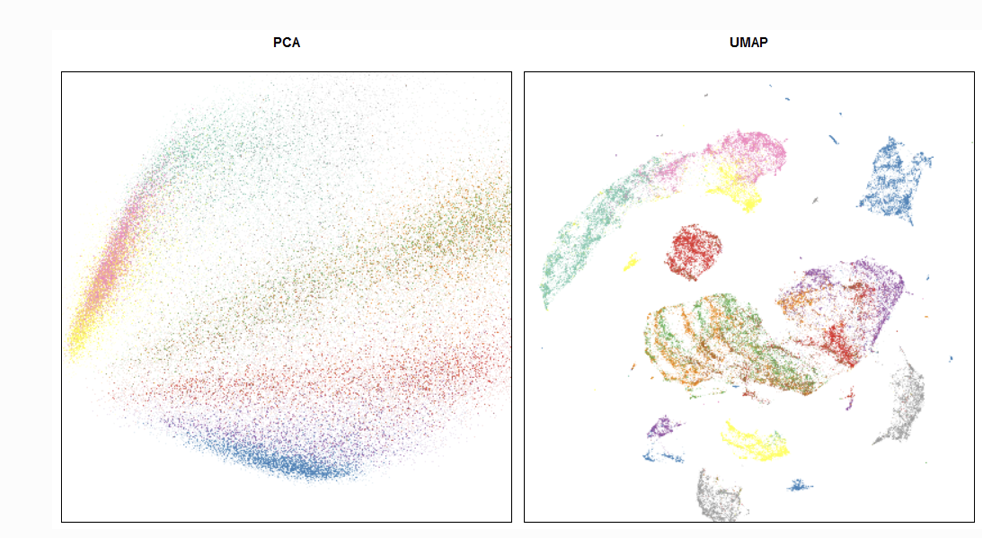

Comparison of PCA / UMAP  embeddings from the Fashion MNIST dataset Figure from:
https://umap-learn.readthedocs.io/en/latest/faq.html 

### *These feature extraction methods help uncover hidden patterns and structures in the data that are not easily detectable by the human eye. They are unsupervised machine learning algorithms, meaning they do not rely on predefined labels.*

### What is unsupervised machine learning? 

 Unsupervised machine learning, involves analysing and discovering hidden patterns or structures in data **without requiring labels**. It allows the machine to learn from data without supervision.

In [57]:
from sklearn.decomposition import PCA # We import the module that will allow us to do PCA.
import umap

/Users/meb22/opt/anaconda3/envs/intropython/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Task 3

In this task, we will explore synthetic data with selected proteins from the  Neurology-I panel of Olink, designed to measure targeted proteins relevant to brain health, neuroinflammation, and neurodegeneration. Our cohort consists of 500 individuals, with approximately 40% diagnosed with PD. For each participant, we have 209 protein measurements, along with age, sex, and a tremor severity score derived from wearable sensors. The tremor score ranges from 0 (no tremor) to 4 (severe tremor), capturing the intensity of motor symptoms typical in PD. Some proteins are expected to show PD-specific patterns, while others may vary with age, sex, or tremor severity. This allows us to explore molecular signatures of disease and symptom severity in a biologically relevant context.


In [58]:
df = pd.read_csv("DF_for_unsupervised.csv", index_col="patient_id")

In [59]:
df

TNF    SESTD1    GLT8D2     IFNL1       LIF      IDI2  \
patient_id                                                                
Patient_001 -1.100779 -0.711299 -0.586564 -0.197535 -0.759040  0.033459   
Patient_002  0.031323 -0.093330 -0.085074  0.813431  0.578638  0.031320   
Patient_003 -0.731762  0.207838  0.194795  0.244203  0.524203  0.009173   
Patient_004 -0.693187 -1.835658  1.171246  1.585646  0.779567 -0.986786   
Patient_005 -1.441482 -0.209453 -1.404564 -1.416498  1.235122 -0.320092   
...               ...       ...       ...       ...       ...       ...   
Patient_496 -0.817697  0.197964 -0.484374  0.957184  0.314561  0.348007   
Patient_497  1.350077 -0.732468 -0.109846  0.719946  1.262775 -1.277449   
Patient_498  0.176403 -1.811798 -2.419928  0.983950  0.423136 -0.983187   
Patient_499  1.732496  0.423953  1.096008 -0.674750  0.598108 -0.044422   
Patient_500  0.693495  0.291053 -0.861365 -0.599898 -0.327582  2.179015   

                  PXN     LYPD1    ARID4B     SIRT5  ...  SMPD1  BST2  ADAM22  \
patient_id                                           ...                        
Patient_001 -0.621818  0.701373  1.031063  0.108543  ...    0.0   0.0     0.0   
Patient_002 -1.491168  0.495286  0.724647  2.301206  ...    0.0   0.0     0.0   
Patient_003  0.268126 -0.041656  1.152866  1.435526  ...    0.0   0.0     0.0   
Patient_004  1.482022 -0.253255 -1.214459 -0.964404  ...    0.0   0.0     0.0   
Patient_005 -0.396662  0.482524 -0.370591  2.103806  ...    0.0   0.0     0.0   
...               ...       ...       ...       ...  ...    ...   ...     ...   
Patient_496  0.957831  1.062423 -1.112950 -0.678853  ...    0.0   0.0     0.0   
Patient_497  0.142027  0.090722  0.259650  0.538939  ...    0.0   0.0     0.0   
Patient_498 -1.043504  0.716194 -0.764113 -1.206946  ...    0.0   0.0     0.0   
Patient_499 -0.792736  0.267510 -0.124171 -0.960513  ...    0.0   0.0     0.0   
Patient_500 -0.781519  0.294682 -1.971931  0.565245  ...    0.0   0.0     0.0   

             CCL2  CCL19  ACVRL1  PD_diagnosis        age     sex    tremor  
patient_id                                                                   
Patient_001   0.0    0.0     0.0             0  31.025268    male  0.000000  
Patient_002   0.0    0.0     0.0             1  35.728713    male  0.618659  
Patient_003   0.0    0.0     0.0             1  33.051672  female  2.386383  
Patient_004   0.0    0.0     0.0             0  28.569890  female  0.000000  
Patient_005   0.0    0.0     0.0             0  27.705558    male  0.000000  
...           ...    ...     ...           ...        ...     ...       ...  
Patient_496   0.0    0.0     0.0             0  78.006592  female  0.000000  
Patient_497   0.0    0.0     0.0             0  78.231080  female  0.000000  
Patient_498   0.0    0.0     0.0             0  82.932082  female  0.000000  
Patient_499   0.0    0.0     0.0             1  81.945474  female  2.673901  
Patient_500   0.0    0.0     0.0             1  85.540122    male  0.265767  

[500 rows x 213 columns]

In [60]:
features = df.columns[0:-4]

In [61]:
df["PD_diagnosis"].value_counts()

PD_diagnosis
0    293
1    207
Name: count, dtype: int64

/Users/meb22/opt/anaconda3/envs/intropython/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


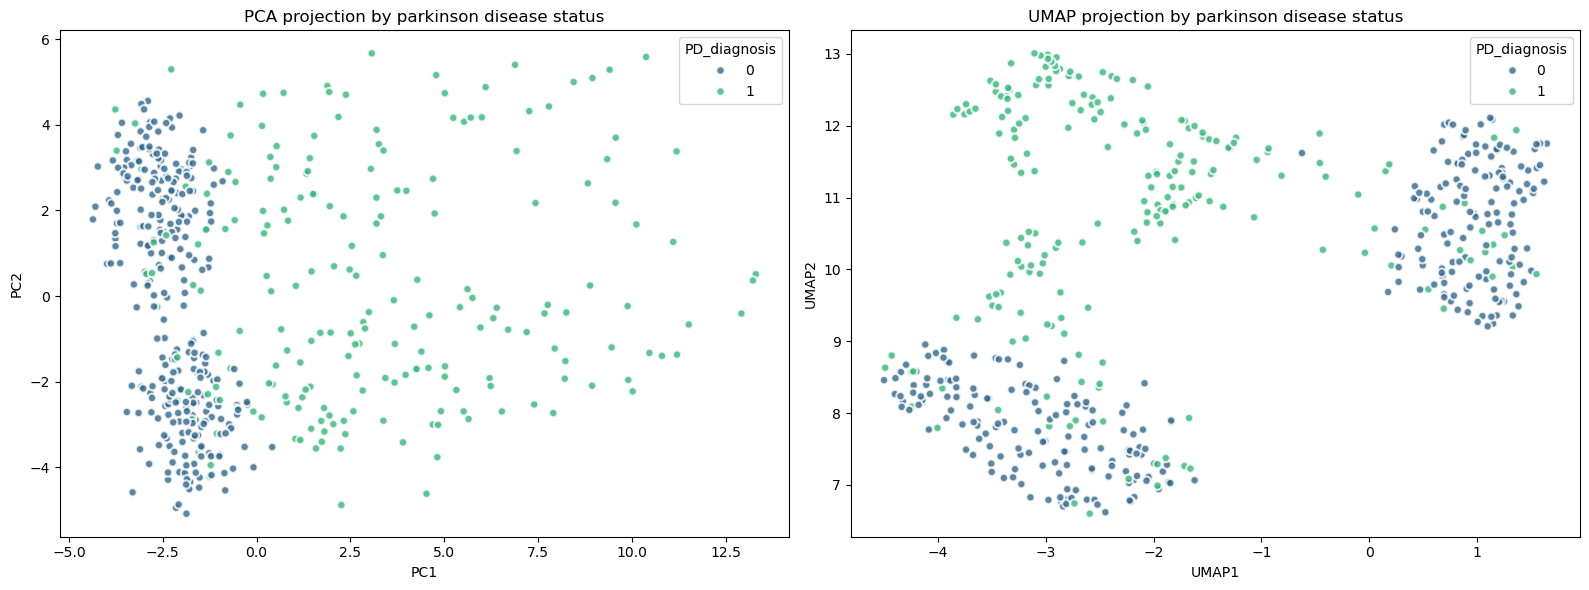

In [62]:

# ----- Scale proteins -----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.loc[:, features])

# ----- PCA -----
pca_result = PCA(n_components=2, random_state=42).fit_transform(X_scaled)
df_pca = pd.DataFrame({
    'PC1': pca_result[:,0],
    'PC2': pca_result[:,1],
    'age': df["age"],
    'sex': df["sex"],
    'PD_diagnosis': df["PD_diagnosis"],
    'tremor': df["tremor"]
})

# ----- UMAP -----
umap_result = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.05, random_state=42).fit_transform(X_scaled)
umap_df = pd.DataFrame({
    'UMAP1': umap_result[:,0],
    'UMAP2': umap_result[:,1],
    'age': df["age"],
    'sex': df["sex"],
    'PD_diagnosis': df["PD_diagnosis"],
    'tremor': df["tremor"]
})

# ----- Plot -----
fig, axes = plt.subplots(1,2, figsize=(16,6))

sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='PD_diagnosis',
    palette='viridis',
    alpha=0.8,
    linewidth=1.5,
    ax=axes[0]
)
axes[0].set_title('PCA projection by parkinson disease status')

sns.scatterplot(
    data=umap_df,
    x='UMAP1', y='UMAP2',
    hue='PD_diagnosis',
    palette='viridis',
    alpha=0.8,
    linewidth=1.5,
    ax=axes[1]
)
axes[1].set_title('UMAP projection by parkinson disease status')

plt.tight_layout()
plt.show()

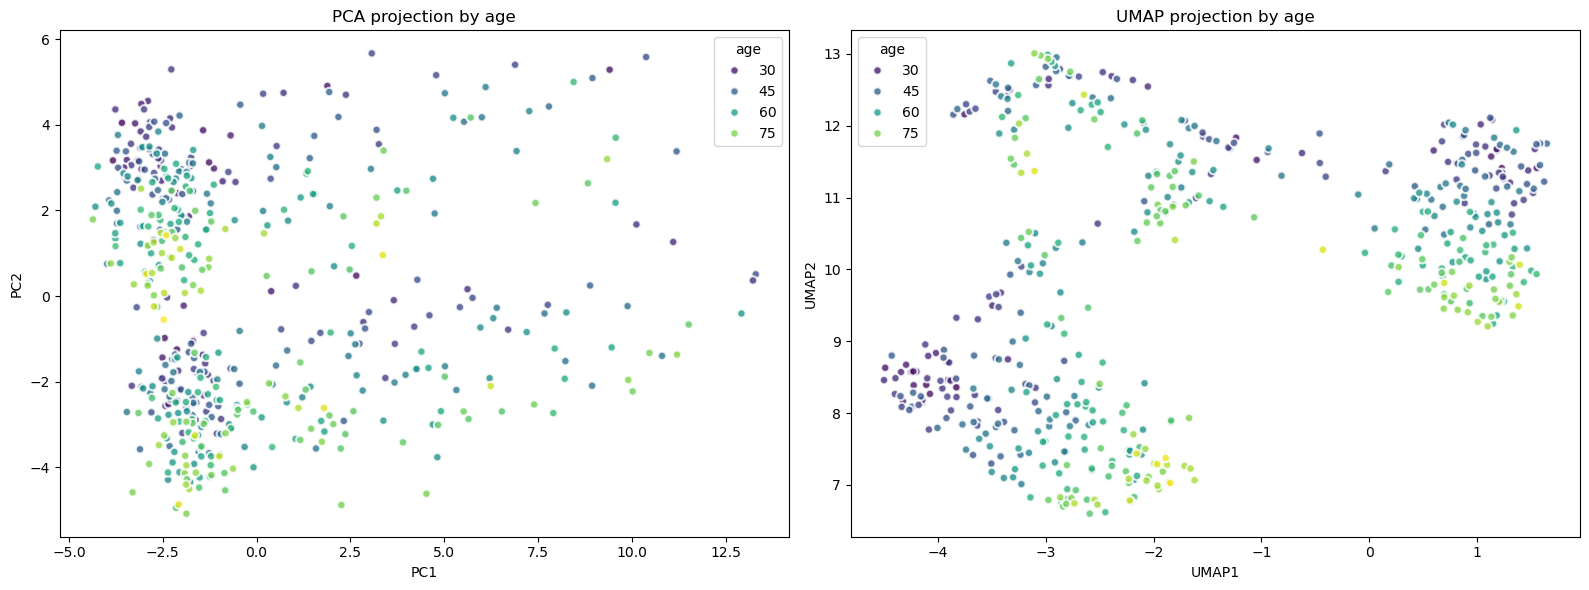

In [63]:
fig, axes = plt.subplots(1,2, figsize=(16,6))

sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='age',
    palette='viridis',
    alpha=0.8,
    linewidth=1.5,
    ax=axes[0]
)
axes[0].set_title('PCA projection by age')

sns.scatterplot(
    data=umap_df,
    x='UMAP1', y='UMAP2',
    hue='age',
    palette='viridis',
    alpha=0.8,
    linewidth=1.5,
    ax=axes[1]
)
axes[1].set_title('UMAP projection by age')

plt.tight_layout()
plt.show()

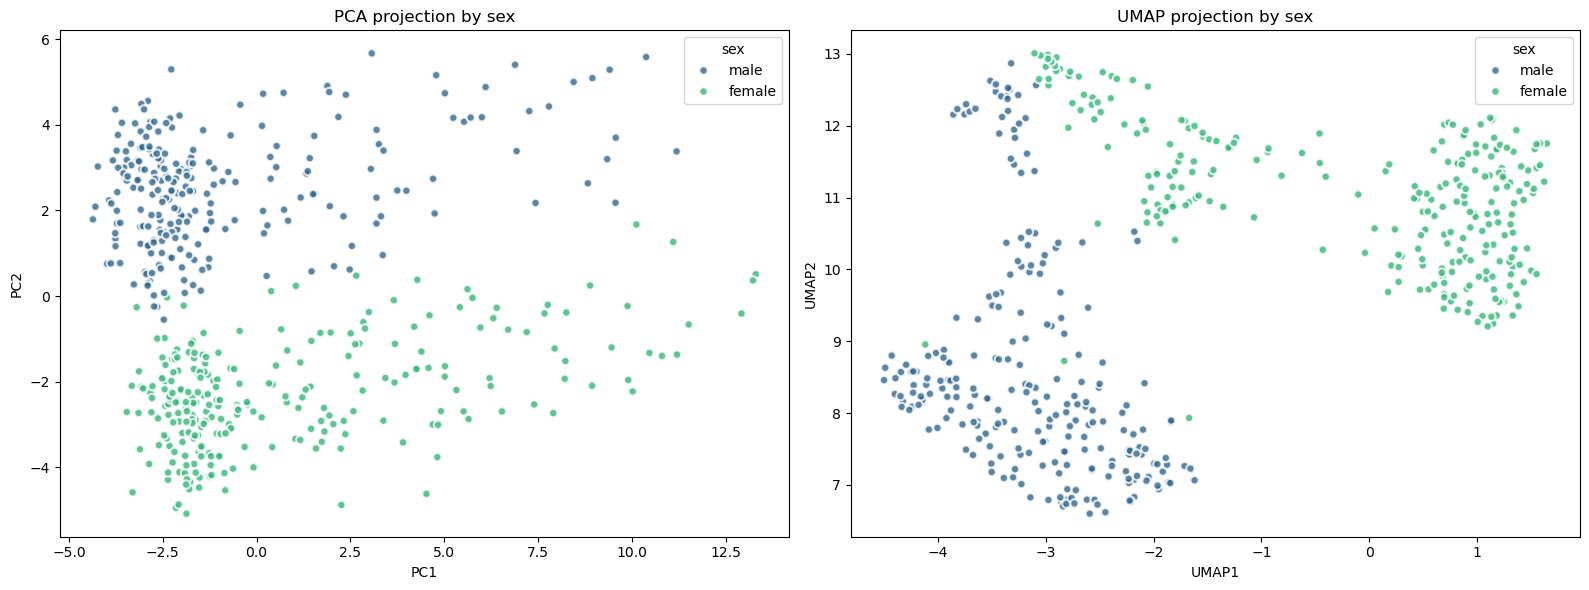

In [64]:
fig, axes = plt.subplots(1,2, figsize=(16,6))

sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='sex',
    palette='viridis',
    alpha=0.8,
    linewidth=1.5,
    ax=axes[0]
)
axes[0].set_title('PCA projection by sex')

sns.scatterplot(
    data=umap_df,
    x='UMAP1', y='UMAP2',
    hue='sex',
    palette='viridis',
    alpha=0.8,
    linewidth=1.5,
    ax=axes[1]
)
axes[1].set_title('UMAP projection by sex')

plt.tight_layout()
plt.show()

### <span style="color:blue">Exercise:</span> Create the same plot above after changing the random state/seed number when doing PCA and UMAP. Does the representation stay rougly the same in both methods? How do you explain the result?

/Users/meb22/opt/anaconda3/envs/intropython/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


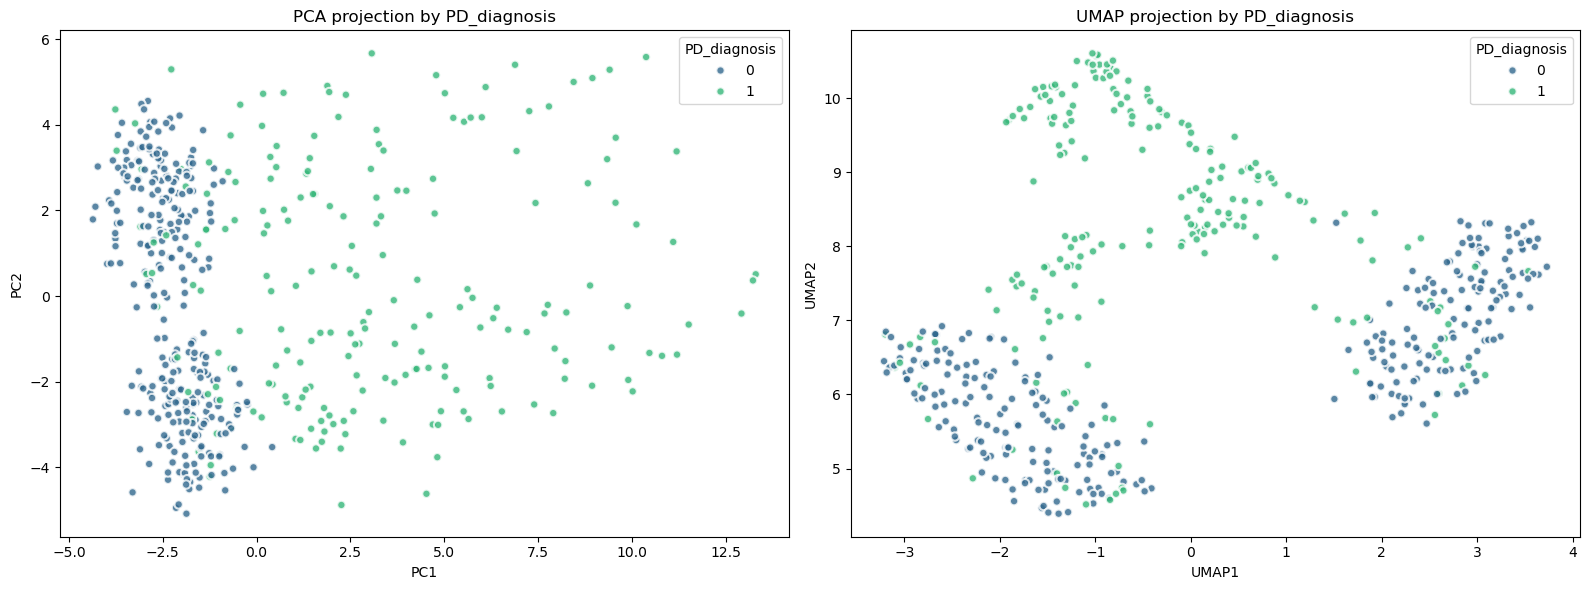

In [65]:
# Answer 

#Because UMAP is a stochastic method, each run may produce slightly different representations — the embedding is drawn from a probability distribution rather than being fixed like PCA. 
#Setting a random seed can make results reproducible.

umap_result_2 = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.05, random_state=20).fit_transform(X_scaled)
umap_df_2 = pd.DataFrame({
    'UMAP1': umap_result_2[:,0],
    'UMAP2': umap_result_2[:,1],
    'age': df["age"],
    'sex': df["sex"],
    'PD_diagnosis': df["PD_diagnosis"],
    'tremor': df["tremor"]
})


pca_result_2 = PCA(n_components=2, random_state=20).fit_transform(X_scaled)
df_pca_2 = pd.DataFrame({
    'PC1': pca_result_2[:,0],
    'PC2': pca_result_2[:,1],
    'age': df["age"],
    'sex': df["sex"],
    'PD_diagnosis': df["PD_diagnosis"],
    'tremor': df["tremor"]
})


# ----- Scale proteins -----
fig, axes = plt.subplots(1,2, figsize=(16,6))

sns.scatterplot(
    data=df_pca_2,
    x='PC1', y='PC2',
    hue='PD_diagnosis',
    palette='viridis',
    alpha=0.8,
    linewidth=1.5,
    ax=axes[0]
)
axes[0].set_title('PCA projection by PD_diagnosis')

sns.scatterplot(
    data=umap_df_2,
    x='UMAP1', y='UMAP2',
    hue='PD_diagnosis',
    palette='viridis',
    alpha=0.8,
    linewidth=1.5,
    ax=axes[1]
)
axes[1].set_title('UMAP projection by PD_diagnosis')

plt.tight_layout()
plt.show()

In the UMAP and PCA, one end of the curve appears enriched in Parkinson’s cases, while the other end has more controls.
This suggests there might be biological differences or progression stages embedded in the data.
However, overlap in the middle region shows that the distinction is not absolute, Parkinson’s and control samples still share molecular features. Let's see whether this has to do with the clinical features we have in the data. 

### <span style="color:blue">Exercise:</span>

Create the same plot above but this time visualise tremor severity. 

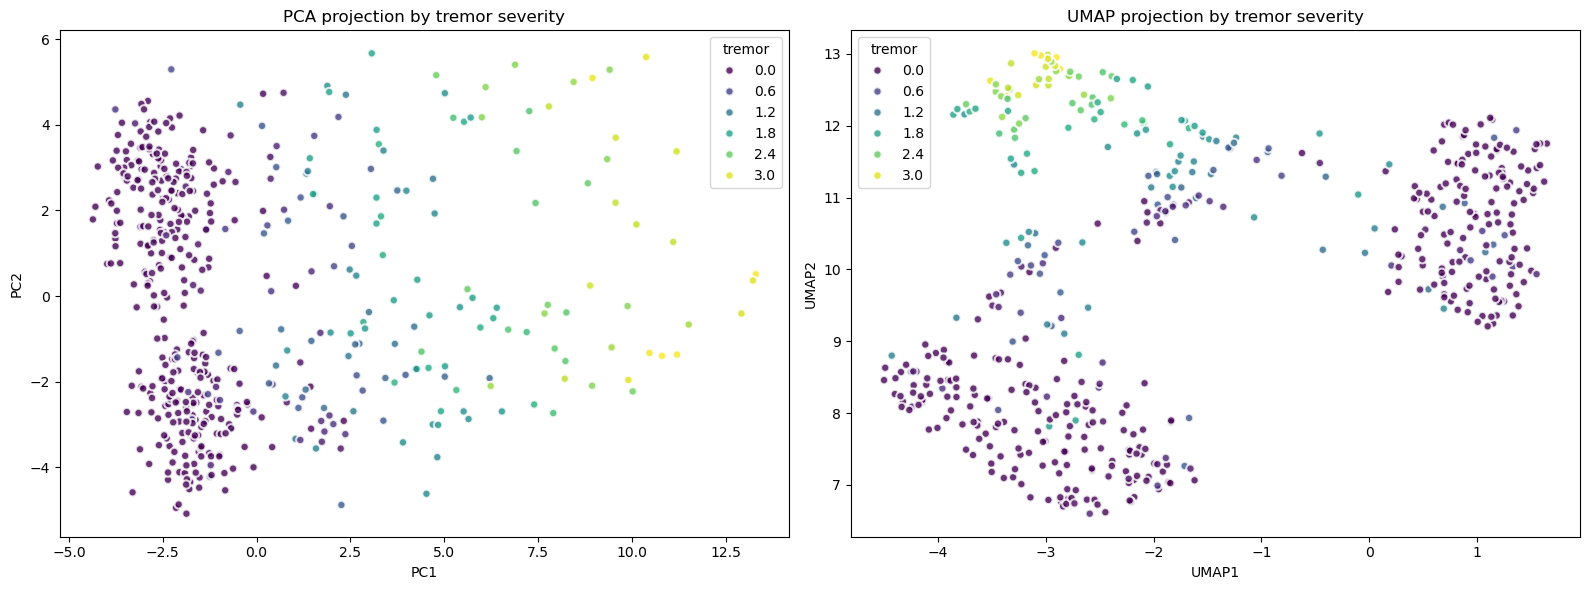

In [66]:
fig, axes = plt.subplots(1,2, figsize=(16,6))

sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='tremor',
    palette='viridis',
    alpha=0.8,
    linewidth=1.5,
    ax=axes[0]
)
axes[0].set_title('PCA projection by tremor severity')

sns.scatterplot(
    data=umap_df,
    x='UMAP1', y='UMAP2',
    hue='tremor',
    palette='viridis',
    alpha=0.8,
    linewidth=1.5,
    ax=axes[1]
)
axes[1].set_title('UMAP projection by tremor severity')

plt.tight_layout()
plt.show()

### Dimensionality in PCA and UMAP

In the previous examples, we projected the data into **2 dimensions** for visualization purposes — this makes it easy to plot and interpret.  

However, both **PCA** and **UMAP** can (and often should) be computed in **more dimensions**, depending on the complexity of your data:

#### PCA
- You can compute as many principal components as there are features (or fewer).  
- Each additional component captures more variance.  
- For downstream analysis (e.g., clustering, classification), it’s common to retain enough components to explain a large fraction of variance (e.g., 80–95%).

#### UMAP
- While 2D is convenient for plotting, UMAP can produce **higher-dimensional embeddings** (e.g., 5, 10, or 50 dimensions).  
- Higher-dimensional UMAP preserves more local and global structure.  
- These embeddings can then be used for clustering, classification, or integration with other datasets, not just visualization.

#### Rule of Thumb
- Use **2D for visualization**.  
- Use **higher dimensions for modeling or analysis**, and only reduce to 2D when you want to plot the results.

---


### How to decide on number of principal components for PCA? 

For this we need to look at how much variance of our data each principal component (PC) explains.

### **PCA Explained Variance**

PCA decomposes a dataset into components that capture the variance in the data. Understanding how much variance each component explains helps determine how many components are meaningful.

### 1. Individual Explained Variance
- The proportion of total variance captured by each PC individually.
- Useful to see which PCs contribute the most information.

### 2. Cumulative Explained Variance
- The proportion of total variance captured by the first k PCs combined.
- Useful to determine how many PCs are needed to capture a desired percentage of variance (e.g., 80%).

### Interpretation
- In datasets with many noisy features, variance is spread across many PCs.
- For example, in a simulated proteomics dataset:
  - Most proteins are noisy.
  - Variance is distributed across many PCs.


Let's see how we can visualise the variance using the library plotly which provides us with interactive plots.

In [67]:
import plotly.graph_objects as go
# Select numeric features (exclude ID and label columns)
features = df.drop(columns=["PD_diagnosis","age","sex","tremor"])

# Scale the data
X_scaled = StandardScaler().fit_transform(features)

# Run PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_var = pca.explained_variance_ratio_ * 100
cum_var = explained_var.cumsum()

# Plot with Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=[f"PC{i+1}" for i in range(len(explained_var))],
    y=explained_var,
    name="Individual explained variance (%)"
))

# Line for cumulative variance
fig.add_trace(go.Scatter(
    x=[f"PC{i+1}" for i in range(len(cum_var))],
    y=cum_var,
    mode="lines+markers",
    name="Cumulative explained variance (%)"
))

fig.update_layout(
    title="PCA Explained Variance",
    xaxis_title="Principal Components",
    yaxis_title="Explained Variance (%)",
    template="plotly_white",
    legend=dict(x=0.7, y=0.1)
)

fig.show()


As you can see, if we include 209 40 principal components (the same number as our original features), we capture 100% of the variance.


However, doing so defeats the purpose of PCA - the goal isn’t to perfectly reconstruct the original data, but to represent it efficiently in fewer dimensions while retaining as much information as possible.

### One way  to select the number of components is selecting the Principal Component that has a drop in variance compared to the previous one. If you zoom in the picture above you will  see that the individual explained variance drops a lot in the 5th PC.


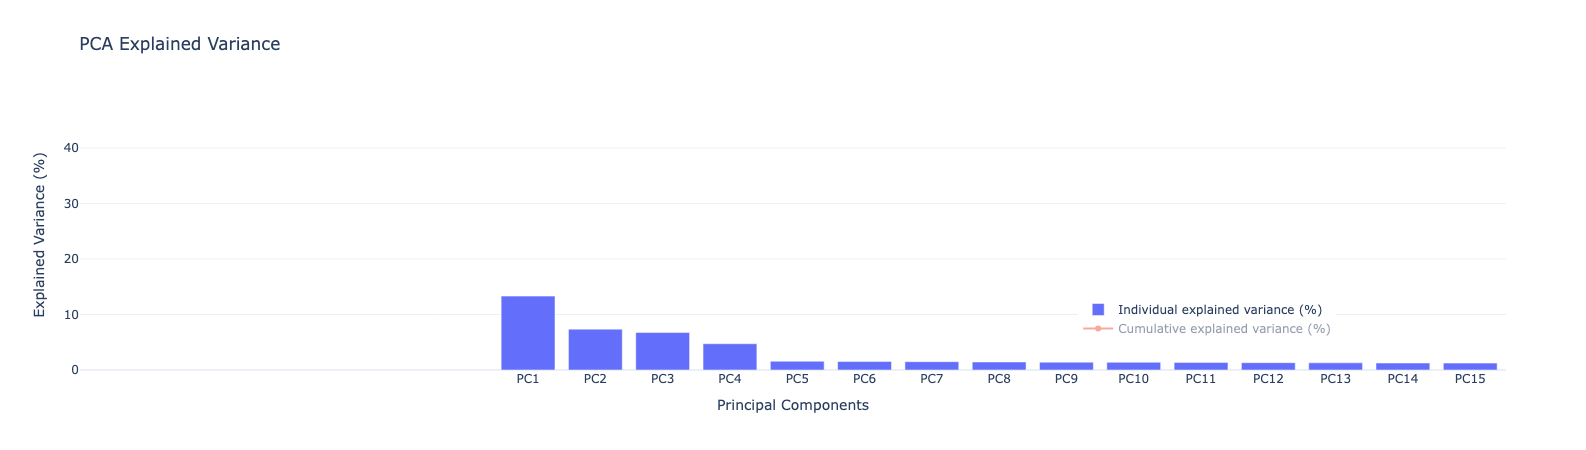





### However, in this case the cumulative variance up to PC5 captures less than 40%. Therefore, we might not capture a lot of information from our dataframe. This method however can be used in other cases.

### So how will we choose how much cumulative variance we want our new columns/ PCs to capture here?

### The strategy, that will be used here, here will be deciding on a cut off. 

Most time, we decide on a specific threshold of cumulative variance. For example,  80% of the variance.


In [68]:

# Find number of PCs that capture at least 80% variance
n_components_80 = np.argmax(cum_var >= 80) + 1
print(f"Number of PCs capturing ≥80% variance: {n_components_80}")

Number of PCs capturing ≥80% variance: 52


In [69]:
# Fit PCA
pca = PCA(n_components=n_components_80)
pca.fit(X_scaled)               
X_pca_filtered = pca.transform(X_scaled)  


### <span style="color:blue">Exercise:</span>  Fix the code to find how many components are capturing 70% of the variance 

In [70]:
= np.argmin(cum_var >1) + 70
print(f"Number of PCs capturing ≥70% variance: ")

SyntaxError: invalid syntax (3833843763.py, line 1)

## Clustering and Unsupervised ML


With the data now represented in a lower-dimensional space, either through the top principal components from PCA or a higher-dimensional UMAP embedding, we can begin to identify groups of similar samples. 

Where do we draw the line to define the groups though? How do we actually find which sample belongs to which group or else **cluster**? 

Clustering is an unsupervised ML technique. Since we don’t have labels, we don’t know a priori how many groups exist or where one group ends and another begins. Clustering algorithms define these boundaries for us.


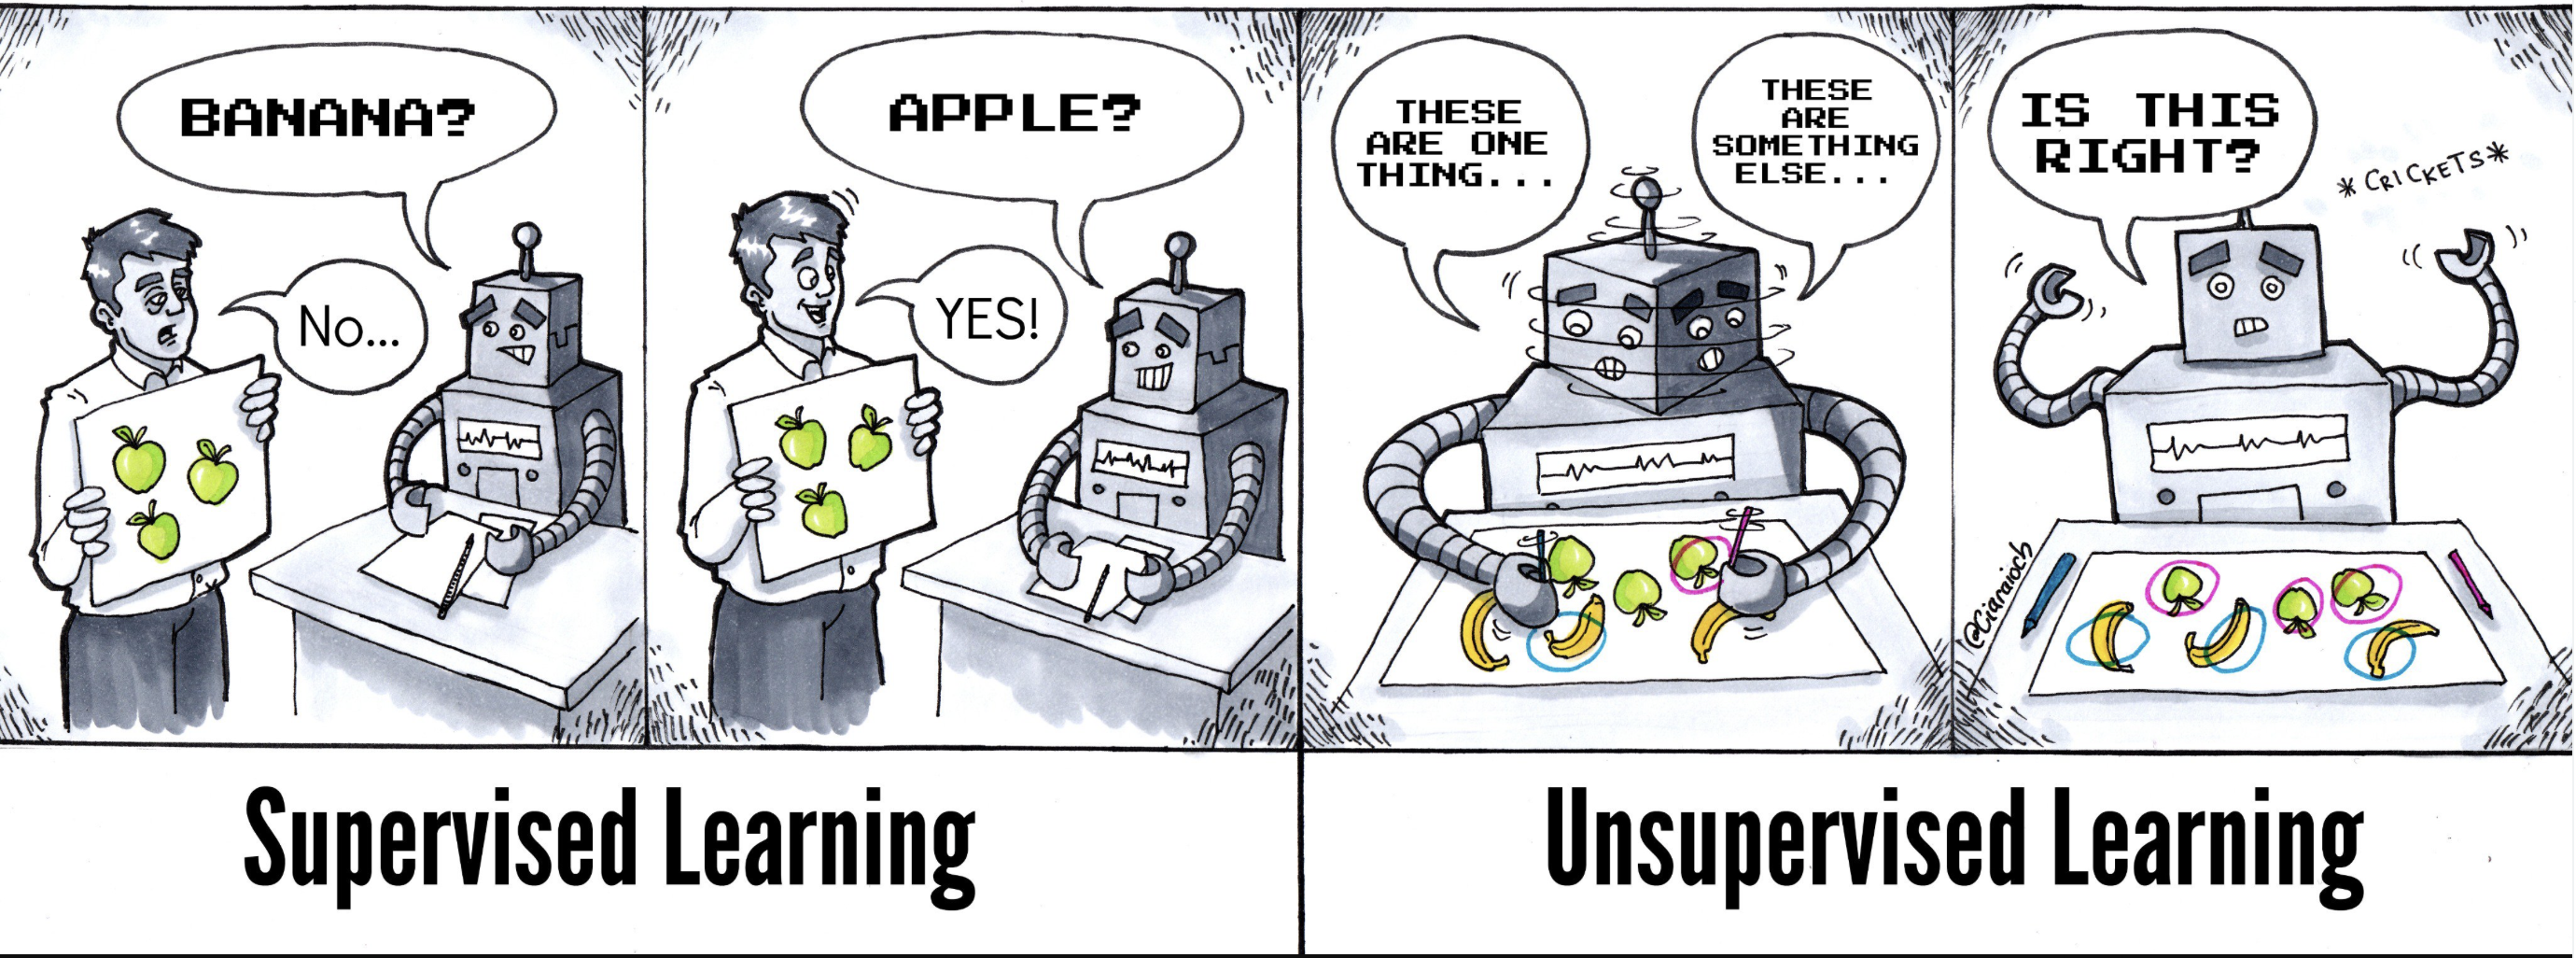




By applying clustering algorithms such as k-means,k-medoids hierarchical clustering or other [clustering methods](https://scikit-learn.org/stable/api/sklearn.cluster.html) on these embeddings, we can uncover natural groupings in the data. While we may visualize the results in 2D for interpretability, the clustering itself is performed in the higher-dimensional space to capture the full complexity of the dataset.

Let's explore the **KMeans** algorithm. 

K-means clustering is an iterative algorithm that groups data points into clusters by minimising the sum of distances between each point and its cluster centroid (the center of the cluster). It typically uses a distance measure, such as Euclidean distance, to determine how close a point is to a cluster center. Points that are nearest to a centroid are assigned to the same cluster. Choosing a higher value of k (the number of clusters) produces smaller, more detailed clusters, while a lower k results in larger, more general clusters. You can read more about this algorithm here: https://www.ibm.com/think/topics/k-means-clustering

In [71]:
from sklearn.cluster import KMeans

> km = KMeans(n_clusters=k, random_state=0, n_init="auto")


As you can see KMeans clustering needs to accept the n_clusters so the number of clusters to be implemented on our data. But how do we decide on the number? 

## Deciding on number of clusters (k=?) ##


One way is checking the **inertia** in regards to the number of clusters, the other one is checking the **silhouette score** in regards to the number of clusters.

What are those and what are their differences?


#### **Inertia in K-means Clustering**

**Inertia** (also called **within-cluster sum of squares**) measures how tightly the points in a cluster are grouped around the cluster centroid. It’s a common way to assess the quality of clustering in K-means.

---

##### Definition

For K-means, inertia is defined as:

$$
\text{Inertia} = \sum_{i=1}^{n} \| x_i - \mu_{c(i)} \|^2
$$

Where:

- $x_i$ = a data point  
- $\mu_{c(i)}$ = centroid of the cluster to which $x_i$ belongs  
- $n$ = total number of points  

---

#####  Intuition

- **Lower inertia** → points are closer to their centroids → clusters are compact.  
- **Higher inertia** → clusters are more spread out → less compact.  

Think of inertia as the total "tightness" or compactness of the clusters.

---


##### Intuition

- **Lower distortion** → points are close to their centroids → tighter clusters.  
- **Higher distortion** → points are spread out → looser clusters.  

Distortion is essentially the **average of inertia per point**, giving a normalized measure of cluster compactness.

---

#### **Silhouette Score**

The **silhouette score** evaluates **how well each point fits into its cluster compared to other clusters**, measuring both cohesion and separation.


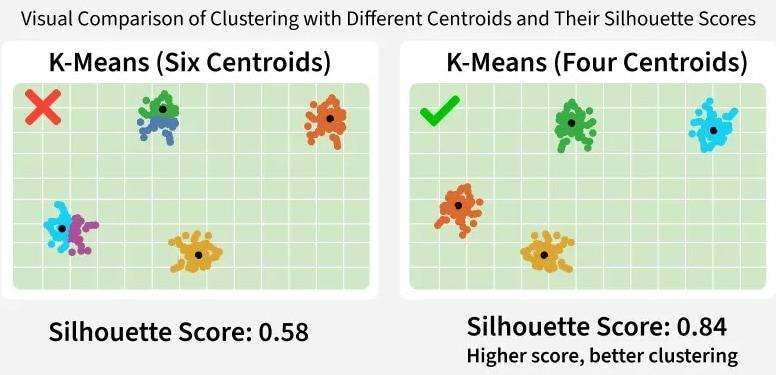

Figure from https://www.geeksforgeeks.org/machine-learning/what-is-silhouette-score/


---

##### Definition

For a single point $i$:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:

- $a(i)$ = average distance between point $i$ and all other points in the **same cluster** (intra-cluster distance)  
- $b(i)$ = minimum average distance from point $i$ to points in the **nearest other cluster** (nearest-cluster distance)  

The **overall silhouette score** is the average across all points:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

---

##### Intuition

- **Score near +1** → point is well-clustered and far from neighboring clusters  
- **Score near 0** → point is on or near the boundary between clusters  
- **Score near -1** → point may be in the wrong cluster  

A **higher silhouette score** indicates better-defined clusters.


## Elbow method - Inertia
We use the **elbow method** to determine the optimal number of clusters (**k**) based on **inertia**. The elbow method helps identify the point where there is a **sudden drop in inertia**, indicating diminishing returns in clustering quality. This point, often called the "elbow," corresponds to the **optimal k** that we should select.


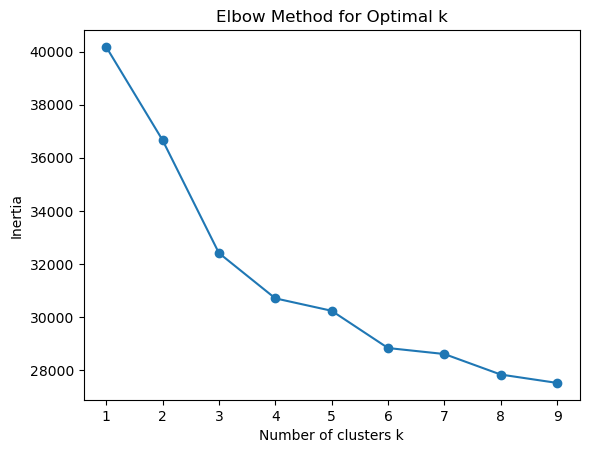

In [72]:


inertia_list = [] #We initialise a list to add all the numbers will be generated from the for loop.
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=0, n_init="auto")
    km.fit(X_pca_filtered)
    inertia_list.append(km.inertia_) # Here we are calculating the inertia and appending it to the list we initialised

plt.plot(K_range, inertia_list, 'o-')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


Let's now evaluate the silhouette score for different numbers of clusters. 

sklearn.metrics have an in-built function for silhouette-score

In [73]:
from sklearn.metrics import silhouette_score

for k in range(2, 10): # We are looping over the number of clusters 2 to 10 and we check how the silhouette score changes.
    km = KMeans(n_clusters=k, random_state=0, n_init="auto")
    labels = km.fit_predict(X_pca_filtered)
    score = silhouette_score(X_pca_filtered, labels)
    print(f"k={k}, silhouette score={score:.3f}")


k=2, silhouette score=0.085
k=3, silhouette score=0.093
k=4, silhouette score=0.095
k=5, silhouette score=0.068
k=6, silhouette score=0.070
k=7, silhouette score=0.060
k=8, silhouette score=0.064
k=9, silhouette score=0.063


### <span style="color:blue">Exercise:</span>  Create a plot like the plot above but this time visualise the fluctuations in silhouette score instead of inertia.

In [74]:
silhouete_list= [] #

K_range = range(x, y)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=0, n_init="auto")
    labels = km.fit_predict(X_pca_filtered)
    silhouette_score_i = silhouette_score(X_pca_filtered, labels) # Here we are calculating the silhouettescore. 
    .append() 

plt.plot(K_range, silhouete_list, 'o-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette')
plt.title('Silhouete score vs k')
plt.show()

SyntaxError: invalid syntax (3708369578.py, line 8)

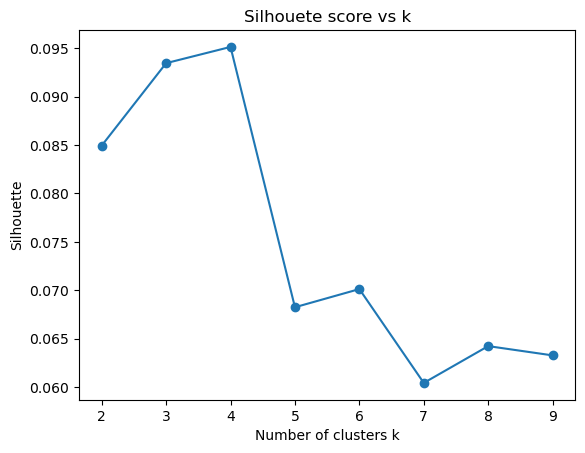

In [75]:
#Answer
silhouete_list= []
K_range = range(2, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=0, n_init="auto")
    labels = km.fit_predict(X_pca_filtered)
    silhouette_score_i = silhouette_score(X_pca_filtered, labels) # Here we are calculating the silhouette score.
    silhouete_list.append(silhouette_score_i)  

plt.plot(K_range, silhouete_list, 'o-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette')
plt.title('Silhouete score vs k')
plt.show()


### The best k number from the elbow plot seems to be k=3. The best number from the silhouette score seems to be k=4. 

### Let's first try the k=3 and see whether it makes sense based on the clinical/biomedical context.

In [76]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X_pca_filtered)
y = pd.Series(kmeans.labels_, index=df_pca.index, name='cluster')

In [77]:
df_pca_labeled = pd.merge(df_pca, y, right_index=True, left_index=True) 

In [78]:
df_pca_labeled

PC1       PC2        age     sex  PD_diagnosis    tremor  \
patient_id                                                                   
Patient_001 -3.456664  3.177593  31.025268    male             0  0.000000   
Patient_002 -2.272170  5.293564  35.728713    male             1  0.618659   
Patient_003  5.622378  0.160477  33.051672  female             1  2.386383   
Patient_004 -2.448162 -0.980153  28.569890  female             0  0.000000   
Patient_005 -3.171351  3.162537  27.705558    male             0  0.000000   
...               ...       ...        ...     ...           ...       ...   
Patient_496 -1.876668 -4.402882  78.006592  female             0  0.000000   
Patient_497 -2.601429 -3.481757  78.231080  female             0  0.000000   
Patient_498 -1.642401 -3.255548  82.932082  female             0  0.000000   
Patient_499  6.240999 -2.100193  81.945474  female             1  2.673901   
Patient_500 -2.406648  1.418414  85.540122    male             1  0.265767   

             cluster  
patient_id            
Patient_001        1  
Patient_002        1  
Patient_003        2  
Patient_004        0  
Patient_005        1  
...              ...  
Patient_496        0  
Patient_497        0  
Patient_498        0  
Patient_499        2  
Patient_500        1  

[500 rows x 7 columns]

In [79]:
df_umap_labeled = pd.merge(umap_df, y, right_index=True, left_index=True) 

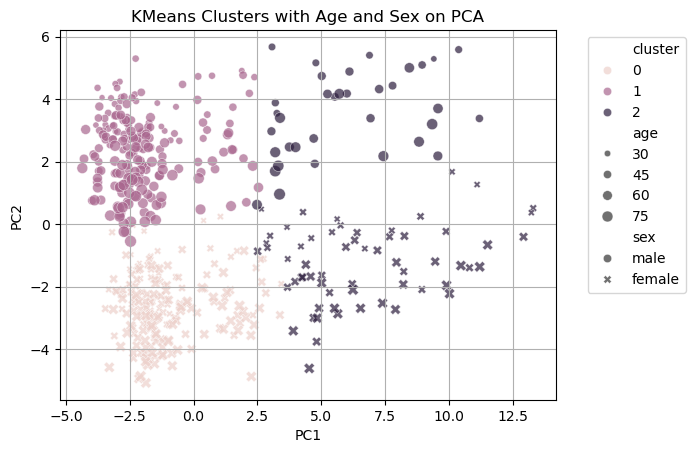

In [80]:
sns.scatterplot(
    x='PC1',
    y='PC2',
    data=df_pca_labeled,
    hue='cluster',   # color by cluster
    style='sex',     # marker shape by sex
    size='age',      # point size by age
    alpha=0.7)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters with Age and Sex on PCA')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend out of plot
plt.grid(True)
plt.show()

### <span style="color:blue">Exercise </span>: Recreate this figure with style being represented by PD_diagnosis, and size being represented by tremor severity. 

/var/folders/q1/m73gh2d94c1cmb4047hn_0p40000gp/T/ipykernel_29855/2990397111.py:13: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



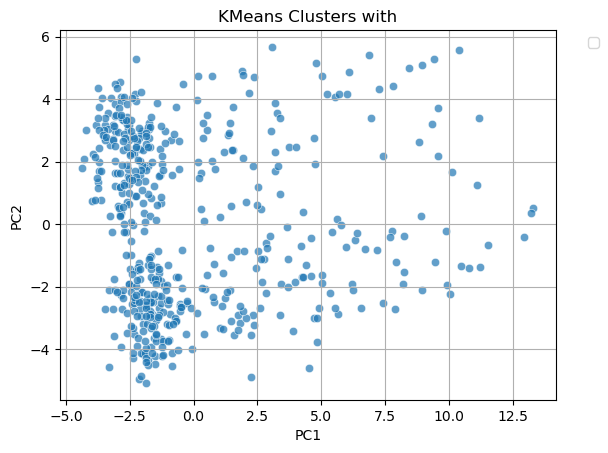

In [81]:
sns.scatterplot(
    x='PC1',
    y='PC2',
    data=df_pca_labeled,
    alpha=0.7,  

    legend='brief'
)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters with')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend out of plot
plt.grid(True)
plt.show()

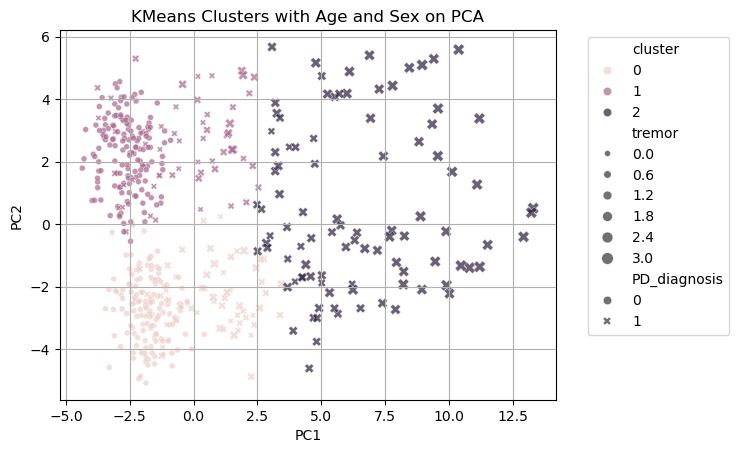

In [82]:
#Answer

sns.scatterplot(
    x='PC1',
    y='PC2',
    data=df_pca_labeled,
    hue='cluster',   # color by cluster
    style='PD_diagnosis',     # marker shape by sex
    size='tremor',      # point size by tremor
    alpha=0.7,  #transparency
)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters with Age and Sex on PCA')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend out of plot
plt.grid(True)
plt.show()

### <span style="color:blue">Exercise:</span> Repeat the clustering using 4 clusters as suggested by the silhouette score method. 


In [83]:
kmeans = KMeans().fit(X_pca_filtered) 
y_2= pd.Series( name='cluster')


In [84]:
#Answer: 

kmeans = KMeans(n_clusters=4,random_state=0, n_init="auto").fit(X_pca_filtered) 
y_2= pd.Series(kmeans.labels_, index=df_pca.index, name='cluster')

In [85]:
df_pca_labeled_2 = pd.merge(df_pca, y_2, right_index=True, left_index=True) 

### <span style="color:blue">Exercise:</span> Can you visualise the 4 clusters using the PC1, PC2 and using hue, style and size to understand what the 4 clusters correspond to? Which number of clusters do you think is better at representing the biomedical/clinical context?
 

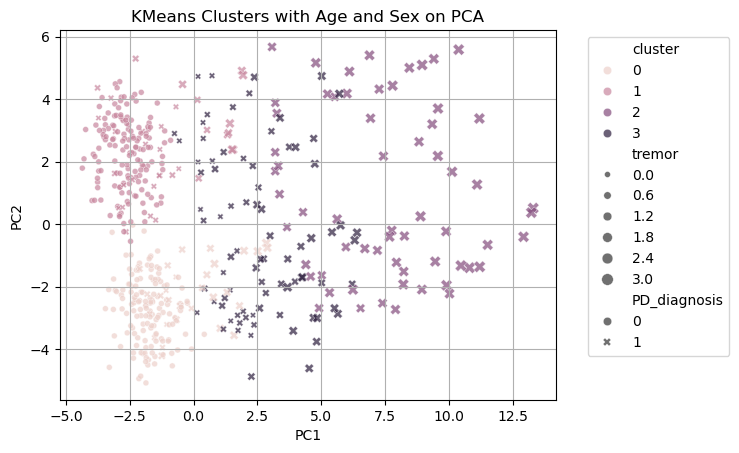

In [86]:
#Answer

sns.scatterplot(
    x='PC1',
    y='PC2',
    data=df_pca_labeled_2,
    hue='cluster',   # color by cluster
    style='PD_diagnosis',     # marker shape by PD diagnosis
    size='tremor',      # point size by tremor
    alpha=0.7,  #transparency
)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters with Age and Sex on PCA')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend out of plot
plt.grid(True)
plt.show()

# <span style="color:blue"> 🏆 Challenge:</span> Plasma Proteomics and Organ-Specific Aging

# Exploring Intestinal Organ Aging Using Plasma Proteomics

In this challenge, we investigate how **plasma proteomics** can reveal organ-specific aging patterns, inspired by **Oh et al., 2023**. Their work demonstrated that plasma protein levels can be leveraged to estimate the **biological age of individual organs**, uncovering that individuals with neurodegenerative diseases often exhibit **accelerated aging in peripheral organs**, not just the brain ([Oh et al., 2023](https://www.nature.com/articles/s41586-023-06802-1#Sec2)).

Here, we simulate a similar scenario using a **synthetic OLINK neurodegenerative proteomics panel**, focusing on predicting **“intestinal organ age”** from protein expression in 500 individuals. The intestine is of particular interest because emerging evidence suggests a **“body-first” pathway in neurodegenerative diseases** such as Parkinson’s disease, where early pathological changes may be detectable in the gut ([Borghammer & Van Den Berge, 2021](https://pubmed.ncbi.nlm.nih.gov/34763110/)).

## Clinical Measures

To complement the proteomics data, we incorporate self-reported and objective measures of prodromal symptoms:

### 1. Constipation

We simulated the **Wexner Constipation Score**, a self-reported questionnaire ranging from 0 to 30, where higher scores indicate more severe constipation and a clinical cut-off of 15. The Wexner questionnaire has been validated across populations and scoring systems for constipation and obstructed defecation ([Royal Berkshire NHS, 2023](https://www.royalberkshire.nhs.uk/media/hypgjuh0/wexner-constipation-questionnaire_dec23.pdf); [Majidirad et al., 2021](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8245831/); [Sharma & Agarwal, 2012](https://www.imsaonline.com/january-march-2012/19.pdf/))

### 2. Hyposmia
Measured via the **University of Pennsylvania Smell Identification Test (UPSIT)**, where scores ≤18 indicate complete anosmia. UPSIT score classifications for adults are as follows (Doty, 1995); [Brumm et al., 2023](https://pmc.ncbi.nlm.nih.gov/articles/PMC10115503/):

- **Normosmia:** Male ≥34, Female ≥35  
- **Mild Microsmia:** Male 30–33, Female 31–34  
- **Moderate Microsmia:** Male 26–29, Female 26–30  
- **Severe Microsmia:** Both sexes 19–25  
- **Total Anosmia:** Both sexes ≤18  

### 3. Motor Function
Evaluated using the **Unified Parkinson’s Disease Rating Scale Part III (UPDRS-III)**, which ranges from 0 to 132, with higher scores indicating more severe motor impairment.

---

Together, these clinical measures and synthetic proteomics data allow us to explore how **intestinal organ age relates to prodromal non-motor and motor symptoms**, potentially reflecting early pathological changes in neurodegenerative disease.

--- 
## 1. Data Loading & libraries

- Check all the tasks you need to complete below and import all the libraries (e.g. pandas, numpy, scikit-learn) you will need in the beginning of the notebook. 
- Load the dataset using **pandas**.  
- Make patient_id your index for your convenience.


---

## 2. Explore Relationships with Clinical Variables

- Examine correlations between **organ age** and clinical variables.  
- Visualize using scatter plots or correlation heatmaps.  
- Discuss what these relationships indicate about early organ aging patterns and prodromal symptoms.

---

## 3. Regression Task: Predict Organ Age
- Split the dataset into **training (80%)** and **test (20%)** sets.  
Compare three feature selection/representation approaches:

### 3.1 Use of all features

### 3.2 Statistically Selected Proteins

- Compute **correlation** between each protein and organ age.  
- Select the proteins with the significant correlations to organ age(absolute value).

### 3.1 PCA and UMAP Features
- Reduce dimensionality using **Principal Component Analysis (PCA)**.  
- Use **Uniform Manifold Approximation and Projection (UMAP)** for nonlinear feature reduction.  
- Visualize PCA and UMAP embeddings to observe feature structure.



### Regression Workflow

For each approach:

1. Train a **linear regression model**.
2. Evaluate using:
   - **R² score**  
   - **Mean Absolute Error (MAE)**  
   - **Mean Squared Error (MSE)**  
3. Identify which feature representation yields the **best regression performance**.

---

## 4. Classification Task: Young vs. Old Organs

- Convert continuous organ age into binary classes:  
  - **Young:** organ_age < 0.5  
  - **Old:** organ_age ≥ 0.5  
- Train a **linear classifier** (Logistic Regression) using feature sets defined from (1. statistical test young vs old organ age 2.UMAP , 3.PCA)  
- Evaluate performance using:
  - **Accuracy**  
  - **Precision, Recall, Specificity**  
  - **Confusion Matrix** (visualize with **matplotlib** or **seaborn**)  

---

## 5. Reporting & Visualization

- Present a **comparison table** of regression and classification metrics for all feature sets.  
- Include visualizations:
  - **Bar plot** comparing regression R² scores across feature sets.  
  - **Confusion matrix plot** for the classification model.  

---

## 6. Discussion

- Comment on relationships between organ age and clinical variables.  
- Interpret which feature set works best and why.  

---

## References

1. Oh, Y., et al. (2023). *Plasma proteomics reveals organ-specific aging patterns*. **Nature**. [https://www.nature.com/articles/s41586-023-06802-1](https://www.nature.com/articles/s41586-023-06802-1#Sec2)  
2. Borghammer, P., & Van Den Berge, N. (2021). *Body-first vs. brain-first Parkinson’s disease: a review*. **Nature Reviews Neurology**, 17, 273–286. [https://pubmed.ncbi.nlm.nih.gov/34763110/](https://pubmed.ncbi.nlm.nih.gov/34763110/)  
3. Royal Berkshire NHS. *Wexner Constipation Questionnaire*. 2023. [https://www.royalberkshire.nhs.uk/media/hypgjuh0/wexner-constipation-questionnaire_dec23.pdf](https://www.royalberkshire.nhs.uk/media/hypgjuh0/wexner-constipation-questionnaire_dec23.pdf)  
4. Majidirad, F., Hadian, M.-R., Soleimani, H.A., Jalaie, S., Ahadi, T., & Bazaz Bebahani, R., Bagheri, H. (2021). *Cross-cultural adaptation, validity, and reliability of the Wexner questionnaire in patients with functional constipation in an Iranian population.* **Gastroenterol Hepatol Bed Bench**
5. Sharma, S., & Agarwal, B.B. (2012). *Scoring systems in evaluation of constipation and obstructed defecation syndrome (ODS)*. **JIMDS**, 25(1), 57–59.[PMC8245831](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8245831/)
6. Doty, R.L. (1995). *The smell identification test: administration manual*. Sensonics, Inc.
7. Brumm, M.C., Pierz, K.A., Lafontant, D.-E., Caspell-Garcia, C., Coffey, C.S., Siderowf, A., & Marek, K. (2023). *Updated Percentiles for the University of Pennsylvania Smell Identification Test in Adults 50 Years of Age and Older.* **Neurology** [PMC10115503](https://pmc.ncbi.nlm.nih.gov/articles/PMC10115503/)

---


### 📝 **Summary**

1. **Regression** and **classification** are types of **supervised ML**.  
2. **Regression** predicts continuous outcomes and is evaluated using metrics like **R²**, **MAE**, and **MSE**.  
3. **Classification** predicts discrete labels and is evaluated using the **confusion matrix** and metrics such as **sensitivity**, **specificity**, **precision**, and **accuracy**.  
4. To avoid **data leakage** from the test set to the training set, we scale, impute, and perform feature selection on the **training set** first, then apply the same transformations to the **test set**.  
5. More features do **not always improve performance**—remember the **curse of dimensionality**.  
6. **Unsupervised ML** includes techniques like **PCA** and **UMAP**, which are used for **data visualization** and **dimensionality reduction**.  
7. To decide on the number of principal components (PCs), inspect the **individual and cumulative variance** explained by each PC.  
8. **Unsupervised ML** also includes **clustering**, such as **k-means**, which groups data **without labels**.  
9. To decide on the optimal number of clusters (**k**), we can inspect the **inertia** using the **elbow method** and the **silhouette score** for different values of k.
